In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r'/content/drive/MyDrive/data/Urpp proc.xlsx', header = 3, sheet_name=None)

#segregate data into self and agent and store in corresponding dictionaries

search_key = '31-35'
agent_all = {}
self_int_all = {}
# loop through the dictionary and save csv
for sheet_name, df in data.items():
  if search_key in sheet_name:
    agent_all[sheet_name] = df
  else:
    self_int_all[sheet_name]=df

print(agent_all.keys())
print(self_int_all.keys())

dict_keys(['P1-31-35', 'P2-31-35', 'P3-31-35', 'P4-31-35', 'P5-31-35', 'P6-31-35', 'P7-31-35', 'P8-31-35', 'P9-31-35', 'P10-31-35', 'P11-31-35', 'P12-31-35', 'P13-31-35', 'P14-31-35', 'P15-31-35', 'P16-31-35', 'P17-31-35', 'P18-31-35', 'P19-31-35', 'P20-31-35', 'P21-31-35', 'P22-31-35', 'P23-31-35', 'P24-31-35', 'P25-31-35', 'P26-31-35', 'P27-31-35', 'P28-31-35', 'P29-31-35', 'P30-31-35', 'P31-31-35', 'P32-31-35', 'P33-31-35', 'P34-31-35', 'P35-31-35', 'P36-31-35', 'P37-31-35', 'P38-31-35', 'P39-31-35', 'P40-31-35', 'P41-31-35', 'P42-31-35', 'P43-31-35', 'P44-31-35', 'P45-31-35', 'P46-31-35', 'P47-31-35', 'P48-31-35', 'P49-31-35', 'P50-31-35', 'P51-31-35', 'P52-31-35', 'P53-31-35'])
dict_keys(['P1-41-45', 'P2-41-45', 'P3-41-45', 'P4-41-45', 'P5-41-45', 'P6-41-45', 'P7-41-45', 'P8-41-45', 'P9-41-45', 'P10-41-45', 'P11-41-45', 'P12-41-45', 'P13-41-45', 'P14-41-45', 'P15-41-45', 'P16-41-45', 'P17-41-45', 'P18-41-45', 'P19-41-45', 'P20-41-45', 'P21-41-45', 'P22-41-45', 'P23-41-45', 'P24-41

In [4]:

#find the number of cases where each participant chose correctly when the audio and video matched
# 10 cases each for 4 such conditions per part (self/agent) ie. 40 cases in agent and 40 in self
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

agent_matching = []
agent_count= []
self_matching = []
self_count = []

for sheet_name, df in agent_all.items():
  count =0
  for i in df.index:
    if ((df['Matches Audio'][i] == 'Matches') and (df['Matches Target'][i] == 'Matches')):
      count=count+1
  if(count>14):
    agent_matching.append(sheet_name)

for sheet_name, df2 in self_int_all.items():
  count2 =0

  for j in df2.index:
    if ((df2['Matches Audio'][j] == 'Matches') and (df2['Matches Target'][j] == 'Matches')):
      count2=count2+1
  if(count2>14):
    self_matching.append(sheet_name)

#now we have the names of the datasets where they matched more than 15 or more/40
print(agent_matching)
print(self_matching)

#Based on this, create new dictionaries where we keep only those participants who passed the condition in both agent and self
#drop the datasets where they matched less than 15/40 in either condition
agent = {}
self_int = {}
for i in agent_matching:
  for j in self_matching:
    if (i.split('-')[0] == j.split('-')[0]):
      #print("agent: "+ i +", self: "+j)
      agent[i] = agent_all[i]
      self_int[j] = self_int_all[j]

print(agent.keys())
print(self_int.keys())
print(len(self_int.keys()))

#winsorize the reation time such that we set the extreme values as the 95% percemtile and the 6% percentile values
#treating the outliers this way
#can't really have outliers in the categorical data - even if it is there we wont be able to tell
import numpy as np
from scipy.stats.mstats import winsorize

for sheet_name, df in agent.items():
  df['Normalized RT']= winsorize(df['Reaction Time'], limits=[0.05, 0.06])

for sheet_name, df in self_int.items():
  df['Normalized RT']= winsorize(df['Reaction Time'], limits=[0.05, 0.06])

['P1-31-35', 'P2-31-35', 'P4-31-35', 'P5-31-35', 'P6-31-35', 'P7-31-35', 'P8-31-35', 'P9-31-35', 'P10-31-35', 'P11-31-35', 'P12-31-35', 'P13-31-35', 'P16-31-35', 'P17-31-35', 'P18-31-35', 'P19-31-35', 'P20-31-35', 'P22-31-35', 'P23-31-35', 'P24-31-35', 'P25-31-35', 'P26-31-35', 'P27-31-35', 'P28-31-35', 'P29-31-35', 'P32-31-35', 'P33-31-35', 'P34-31-35', 'P35-31-35', 'P37-31-35', 'P39-31-35', 'P40-31-35', 'P41-31-35', 'P42-31-35', 'P43-31-35', 'P44-31-35', 'P45-31-35', 'P46-31-35', 'P47-31-35', 'P48-31-35', 'P49-31-35', 'P50-31-35', 'P51-31-35', 'P52-31-35', 'P53-31-35']
['P1-41-45', 'P2-41-45', 'P3-41-45', 'P4-41-45', 'P5-41-45', 'P6-41-45', 'P7-41-45', 'P8-41-45', 'P9-41-45', 'P10-41-45', 'P11-41-45', 'P12-41-45', 'P13-41-45', 'P14-41-45', 'P16-41-45', 'P17-41-45', 'P20-41-45', 'P22-41-45', 'P23-41-45', 'P24-41-45', 'P25-41-45', 'P26-41-45', 'P27-41-45', 'P28-41-45', 'P29-41-45', 'P31-41-45', 'P32-41-45', 'P33-41-45', 'P34-41-45', 'P35-41-45', 'P36-41-45', 'P37-41-45', 'P38-41-45', '

In [5]:
##compare matching condition for all participants

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

agent_matching = []
agent_avg = []
agent_std = []
self_matching = []
self_avg = []
self_std = []

part_a = 0
part_s = 0

df_matching_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/S'])

for sheet_name, df in agent.items():
  count =0
  sum_time = 0
  std_a = []
  total = 0

  for i in df.index:
    if (df['Target'][i] == df['Audio Source'][i]):
      total = total+1
    if ((df['Matches Audio'][i] == 'Matches') and (df['Matches Target'][i] == 'Matches')):
      count=count+1
      sum_time = sum_time + df['Normalized RT'][i]
      std_a.append(df['Normalized RT'][i])
      df_matching_var.loc[len(df_matching_var.index)] = [part_a, df['Normalized RT'][i],'Agent']

  agent_matching.append((count/total)*100)
  agent_avg.append(sum_time/count)
  agent_std.append(np.std(std_a))
  part_a = part_a+1

for sheet_name, df2 in self_int.items():
  count2 =0
  sum_time2 = 0
  std_s = []
  total = 0
  for j in df2.index:
    if (df2['Target'][j] == df2['Audio Source'][j]):
      total = total+1
    if ((df2['Matches Audio'][j] == 'Matches') and (df2['Matches Target'][j] == 'Matches')):
      count2=count2+1
      sum_time2 = sum_time2 + df2['Normalized RT'][j]
      std_s.append(df2['Normalized RT'][j])
      df_matching_var.loc[len(df_matching_var.index)] = [part_s, df2['Normalized RT'][j],'Self-interaction']

  self_matching.append((count2/total)*100)
  self_avg.append(sum_time2/count2)
  self_std.append(np.std(std_s))
  part_s=part_s+1


print(agent_matching)
print(self_matching)



[60.0, 42.5, 55.00000000000001, 82.5, 70.0, 42.5, 75.0, 55.00000000000001, 75.0, 57.49999999999999, 52.5, 100.0, 40.0, 100.0, 75.0, 55.00000000000001, 60.0, 80.0, 67.5, 97.5, 70.0, 72.5, 47.5, 62.5, 65.0, 82.5, 37.5, 57.49999999999999, 80.0, 40.0, 60.0, 75.0, 72.5, 57.49999999999999, 42.5, 77.5, 75.0, 65.0, 77.5, 47.5, 77.5, 52.5]
[50.0, 62.5, 52.5, 92.5, 55.00000000000001, 75.0, 80.0, 77.5, 62.5, 52.5, 37.5, 97.5, 50.0, 100.0, 72.5, 65.0, 52.5, 75.0, 47.5, 95.0, 75.0, 85.0, 57.49999999999999, 65.0, 70.0, 85.0, 45.0, 67.5, 72.5, 45.0, 57.49999999999999, 75.0, 75.0, 57.49999999999999, 40.0, 77.5, 80.0, 67.5, 82.5, 42.5, 90.0, 60.0]


    Agent Response     Agent  Agent std  Self-interaction Response  \
0             60.0  2.567309   0.903395                       50.0   
1             42.5  2.676235   0.760360                       62.5   
2             55.0  2.817935   1.097457                       52.5   
3             82.5  2.086515   0.510942                       92.5   
4             70.0  2.268314   0.791955                       55.0   
5             42.5  2.216100   0.468775                       75.0   
6             75.0  3.058282   0.647605                       80.0   
7             55.0  2.235928   0.535195                       77.5   
8             75.0  2.885365   0.916803                       62.5   
9             57.5  3.237333   0.944897                       52.5   
10            52.5  1.947258   0.644908                       37.5   
11           100.0  2.016985   0.261999                       97.5   
12            40.0  3.016310   0.664975                       50.0   
13           100.0  

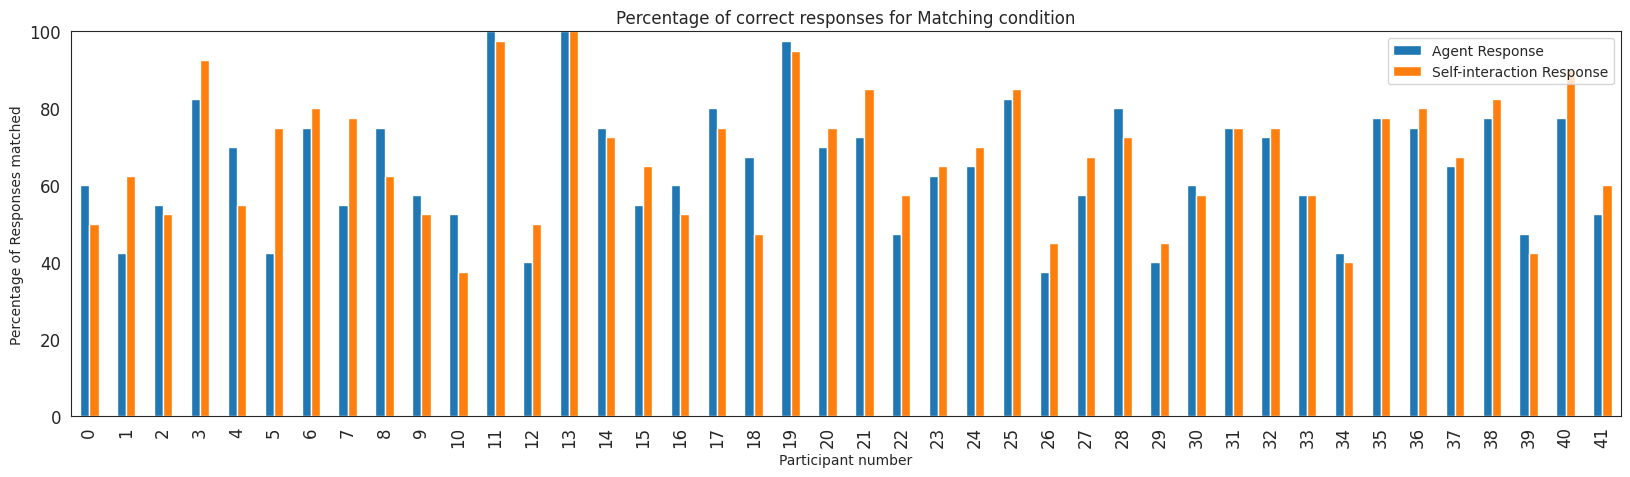

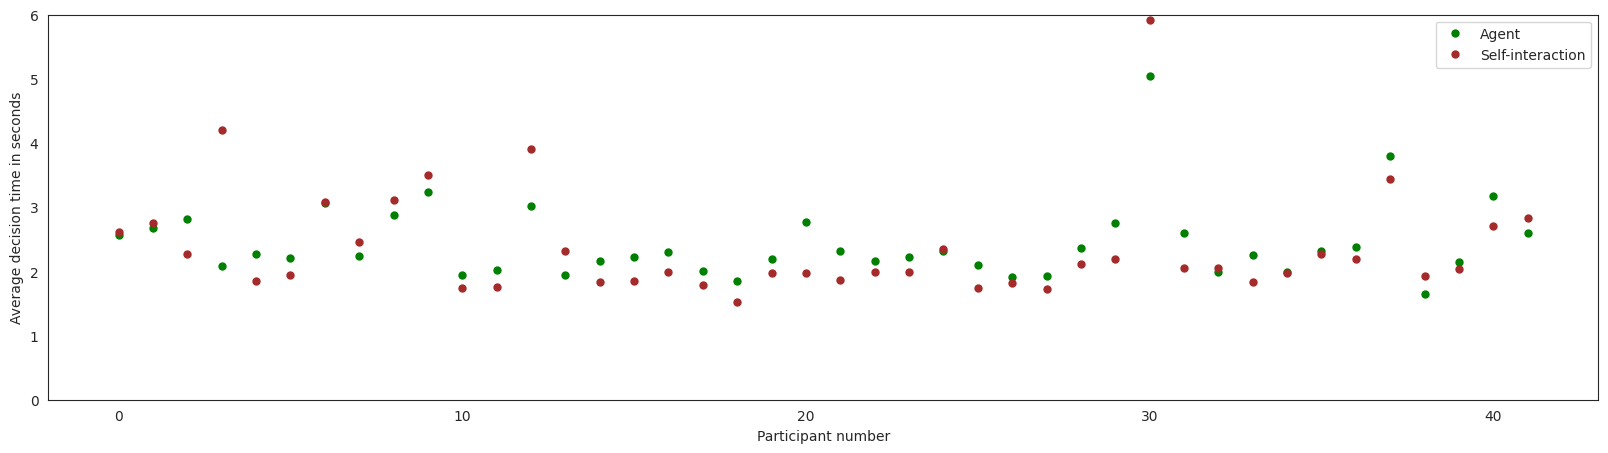

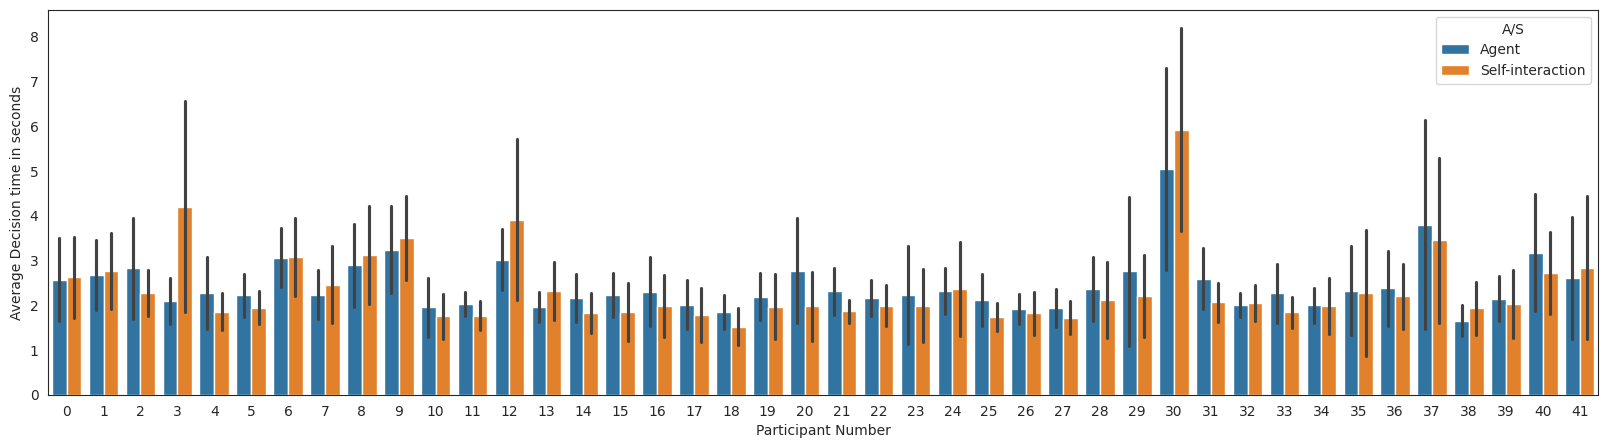

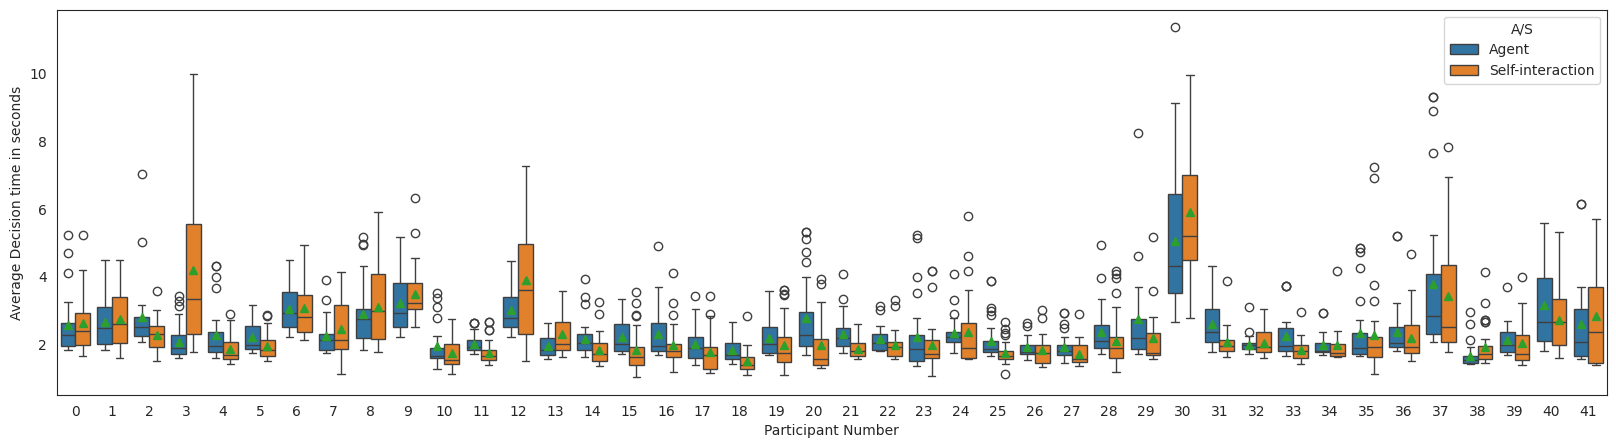

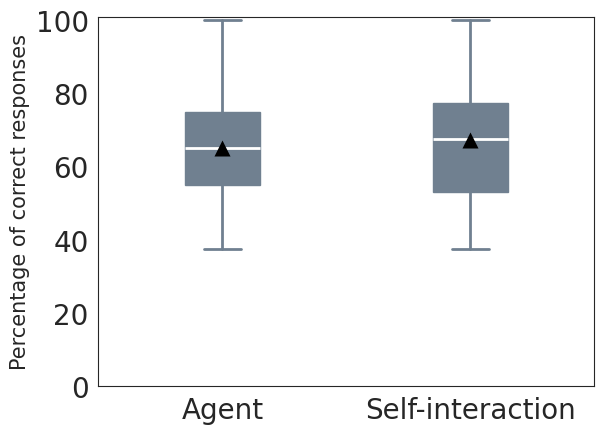

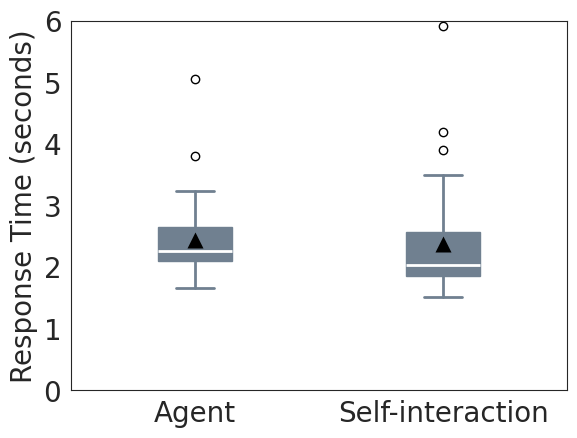

In [10]:
df_chart_matches = pd.DataFrame()
df_chart_matches['Agent Response'] = agent_matching
df_chart_matches['Agent'] = agent_avg #time
df_chart_matches['Agent std'] = agent_std
df_chart_matches['Self-interaction Response'] = self_matching
df_chart_matches['Self-interaction'] = self_avg #time
df_chart_matches['Self-interaction std'] = self_std

print(df_chart_matches)
print(df_matching_var)


#plt.style.use('ggplot')
sns.set_style("white")

# Plotting the number of correct responses
ax1 = df_chart_matches[['Agent Response', 'Self-interaction Response']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses matched')
ax1.set_title('Percentage of correct responses for Matching condition')
plt.show()


#plotting decision time
ax2 = df_chart_matches.plot.line(y = ['Agent', 'Self-interaction'], style='o',  color=['green', 'brown'], figsize=(20,5), markersize=5)
ax2.set(ylim =(0, 6))
ax2.set_xlabel('Participant number')
ax2.set_ylabel('Average decision time in seconds')
plt.show()


fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time for Matching condition (with errorbars set as Standard Deviation)')
sns.barplot(data=df_matching_var, x="Participant Number", y="Decision time", hue="A/S", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time for Matching condition')
sns.boxplot(data=df_matching_var, x="Participant Number", y="Decision time", hue="A/S", showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")
plt.show()

labels = ['Agent', 'Self-interaction']
ax4 = df_chart_matches[['Agent Response', 'Self-interaction Response']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 101))
#ax4.set_title('Percentage of Responses correctly mathced for Matching condition')
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of correct responses', fontsize=15)
ax4.set_xticklabels(labels)
plt.savefig('Matching-agent-vs-self.png', bbox_inches='tight')
plt.show()

##meanprops={'markerfacecolor': "white"}

ax5 = df_chart_matches[['Agent', 'Self-interaction']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_title('Average time for Matching condition')
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Response Time (seconds)', fontsize=20 )
plt.savefig('Matching-agent-vs-self-time.png', bbox_inches='tight')
plt.show()

     Agent  Agent average  Self-interaction  Self-interaction average
0   44.375       2.737660            40.000                  2.575489
1   30.625       2.879679            33.125                  2.698510
2   40.625       2.958849            48.750                  2.880673
3   61.875       2.467998            57.500                  3.874292
4   41.875       2.224083            43.125                  1.919982
5   30.625       2.134567            40.625                  2.077053
6   44.375       3.371338            43.750                  3.335557
7   41.875       2.466178            48.750                  2.457289
8   31.250       3.166754            26.875                  2.903525
9   51.250       3.252476            42.500                  3.853246
10  58.750       1.901633            58.750                  1.871462
11  25.625       2.010018            24.375                  1.760644
12  45.625       3.254339            50.000                  3.310486
13  25.000       1.9

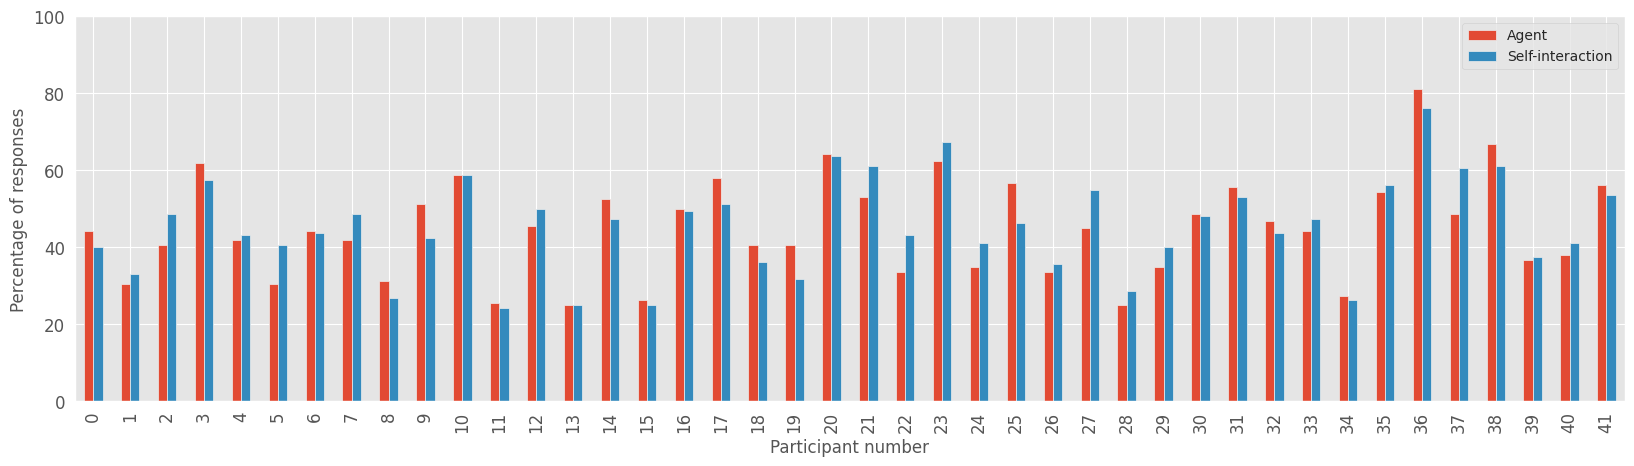

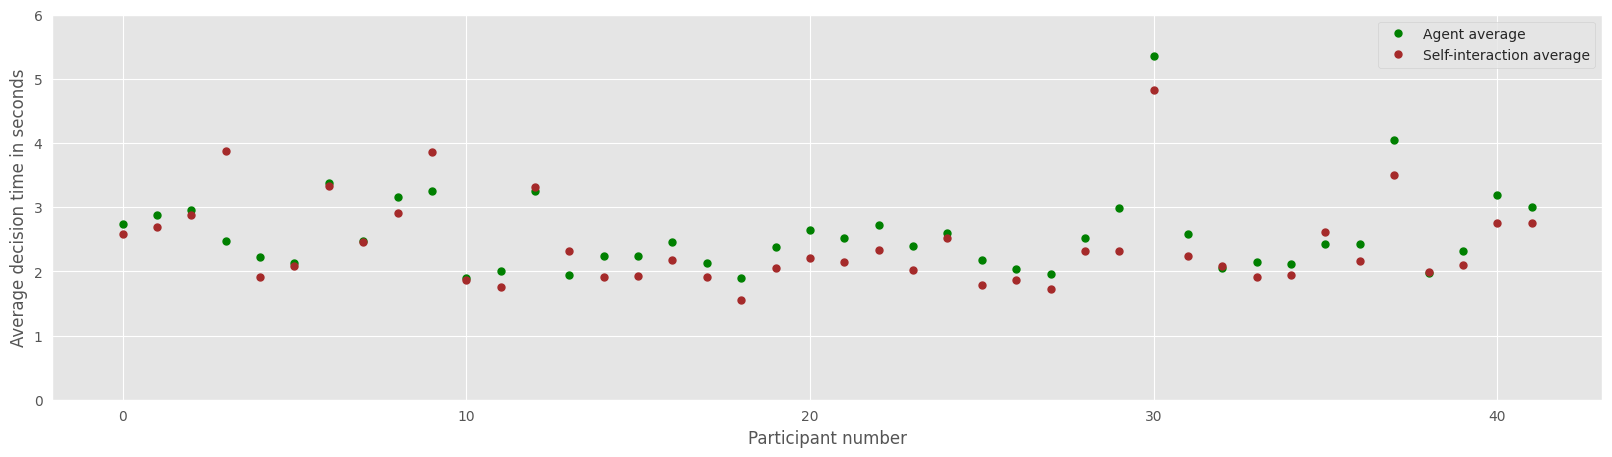

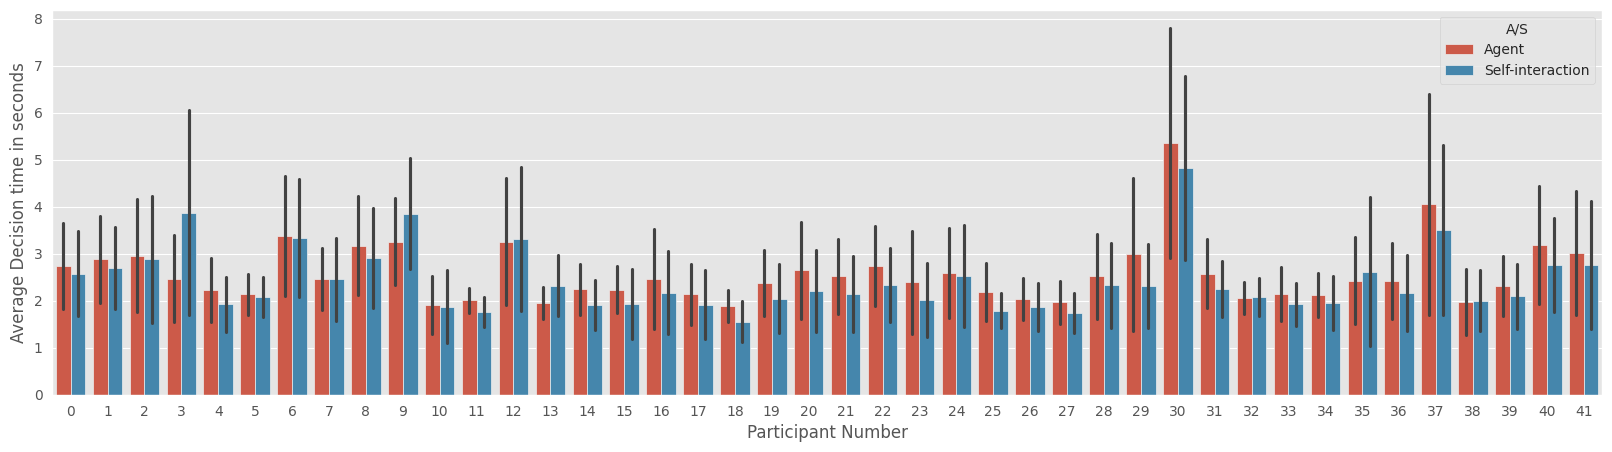

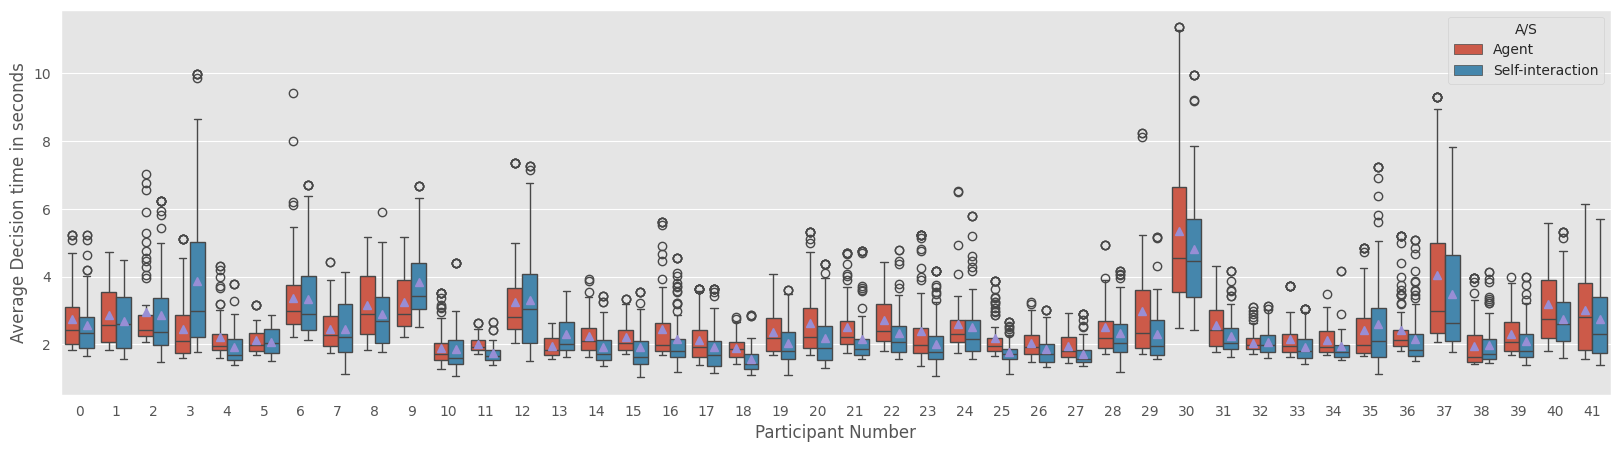

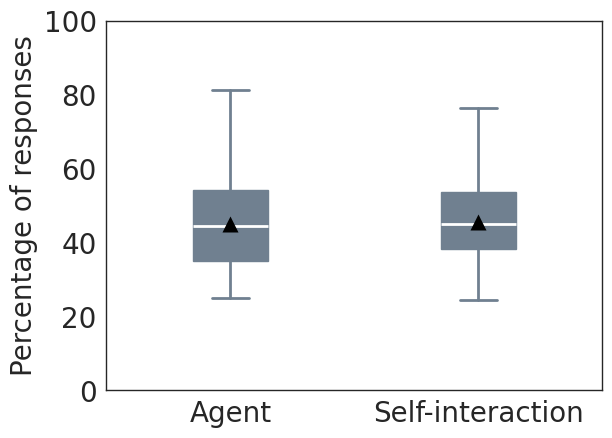

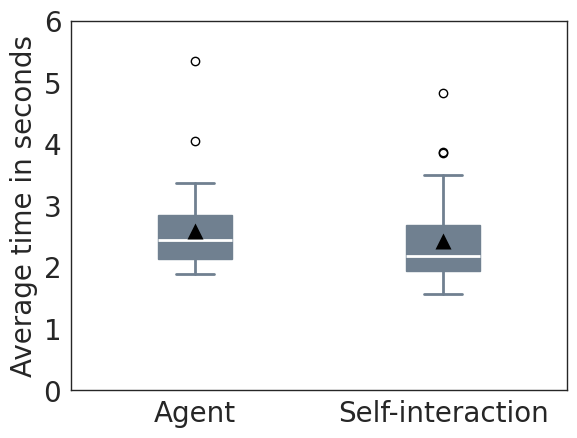

In [12]:
####compare overall response and response time for options selected to audio
agent_matching_audio = []
agent_avg = []
self_matching_audio = []
self_avg = []

part_a = 0
part_s = 0

df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/S'])

for sheet_name, df in agent.items():
  count =0
  sum_time = 0
  for i in df.index:
    if (df['Matches Audio'][i] == 'Matches'):
      count=count+1
      sum_time = sum_time + df['Normalized RT'][i]
      df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Agent']
  agent_matching_audio.append((count/len(df.index))*100)
  agent_avg.append(sum_time/count)
  part_a = part_a +1

for sheet_name, df2 in self_int.items():
  count2 =0
  sum_time2 = 0
  for j in df2.index:
    if (df2['Matches Audio'][j] == 'Matches'):
      count2=count2+1
      sum_time2 = sum_time2 + df2['Normalized RT'][j]
      df_var.loc[len(df_var.index)] = [part_s, df2['Normalized RT'][j],'Self-interaction']
  self_matching_audio.append((count2/len(df.index))*100)
  self_avg.append(sum_time2/count2)
  part_s = part_s+1

#print(agent_matching)
#print(self_matching)
df_chart = pd.DataFrame()
df_chart['Agent'] = agent_matching_audio
df_chart['Agent average'] = agent_avg
df_chart['Self-interaction'] = self_matching_audio
df_chart['Self-interaction average'] = self_avg

print(df_chart)
print(df_var)

plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart[['Agent', 'Self-interaction']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of responses')
#ax1.set_title('Percentage of responses that match the audio')
plt.show()

ax2 = df_chart.plot.line(y = ['Agent average', 'Self-interaction average'], style='o',  color=['green', 'brown'], figsize=(20,5), markersize=5)
#ax2.set_title('Response and average time for when option selected matches the audio')
ax2.set(ylim =(0, 6))
ax2.set_xlabel('Participant number')
ax2.set_ylabel('Average decision time in seconds')
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time for when option selected matches the audio (with errorbars set as Standard Deviation)')
sns.barplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time for when option selected matches the audio')
sns.boxplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")


sns.set_style("white")

ax4 = df_chart[['Agent', 'Self-interaction']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of responses', fontsize = 20)
#ax4.set_title('When option selected matches the audio')
plt.savefig('Aud-agent-vs-self.png', bbox_inches='tight')
plt.show()

labs = ['Agent', 'Self-interaction']
ax5 = df_chart[['Agent average', 'Self-interaction average']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Average time in seconds', fontsize = 20)
ax5.set_xticklabels(labs)
#ax5.set_title('When option selected matches the audio')
plt.savefig('Aud-agent-vs-self-time.png', bbox_inches='tight')
plt.show()

      Agent  Agent average  Self-interaction  Self-interaction average
0    28.750       2.838607            22.500                  2.887141
1    31.250       2.982939            41.250                  2.671937
2    38.125       3.009582            31.250                  2.779809
3    28.750       2.165923            31.875                  4.201438
4    38.750       2.353225            31.250                  2.026871
5    30.000       2.143200            40.000                  1.937150
6    42.500       4.013353            43.125                  3.575084
7    31.875       2.443861            37.500                  2.459613
8    71.250       2.743768            57.500                  2.887389
9    28.125       3.277692            24.375                  3.961887
10   30.000       1.951371            24.375                  1.933610
11   99.375       1.992629            98.750                  1.776028
12   23.125       3.458287            24.375                  3.919513
13  10

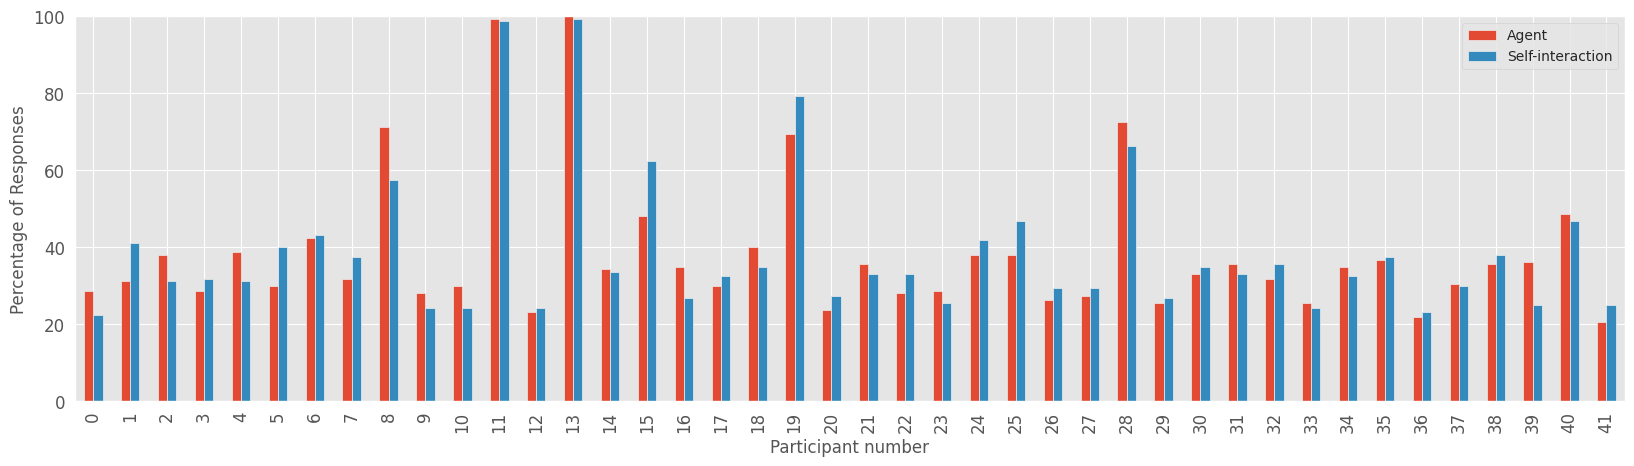

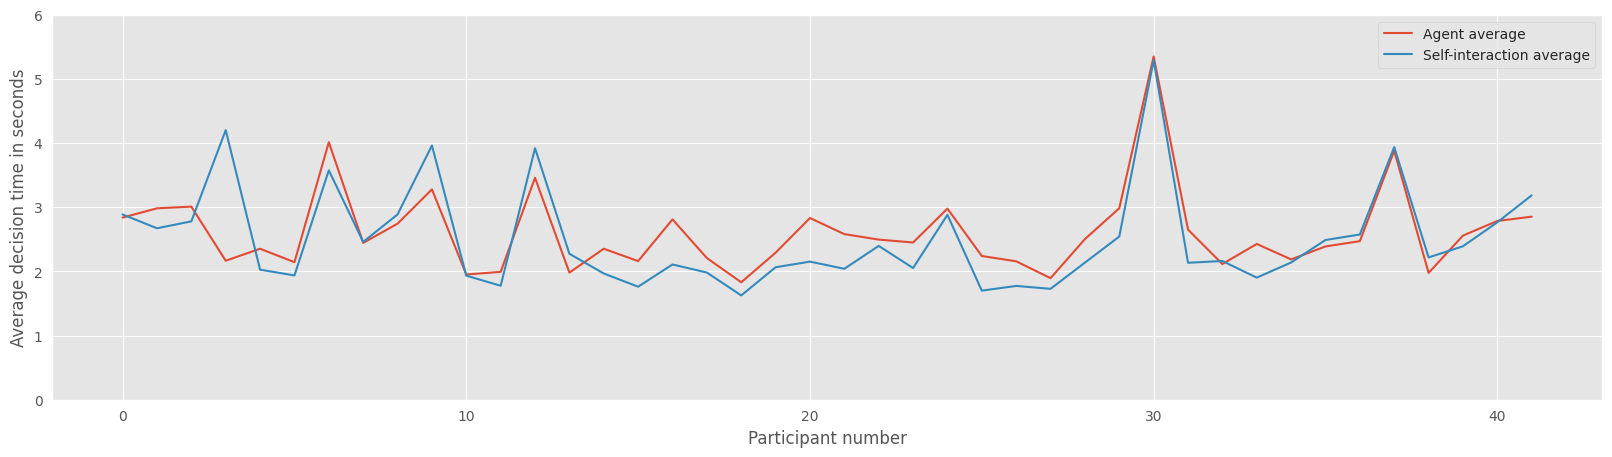

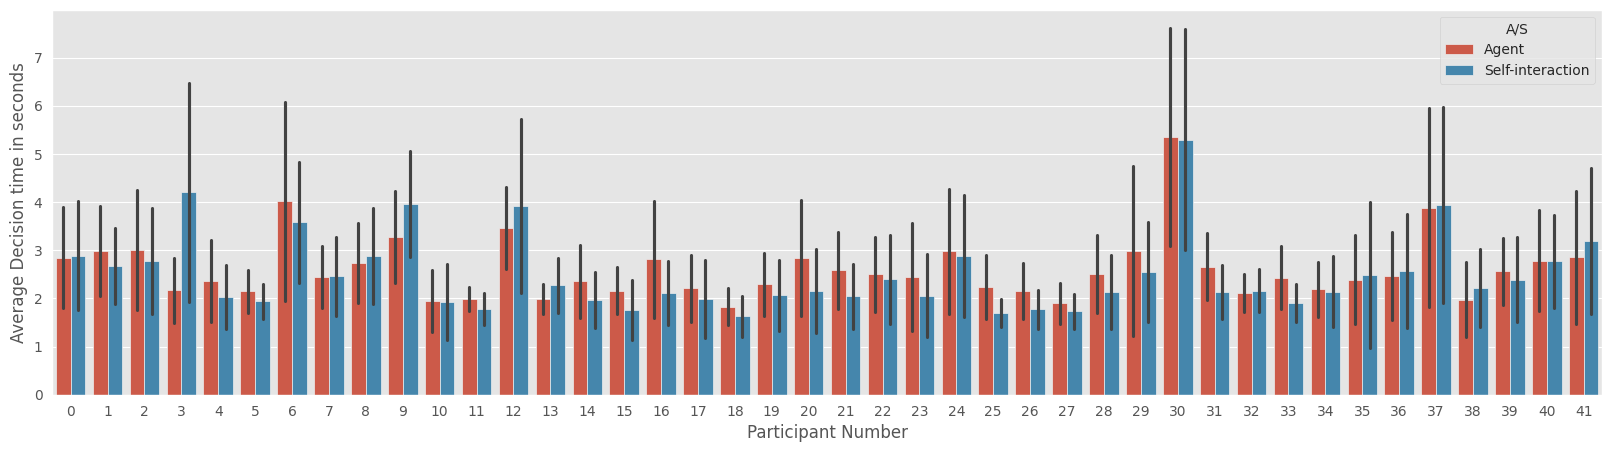

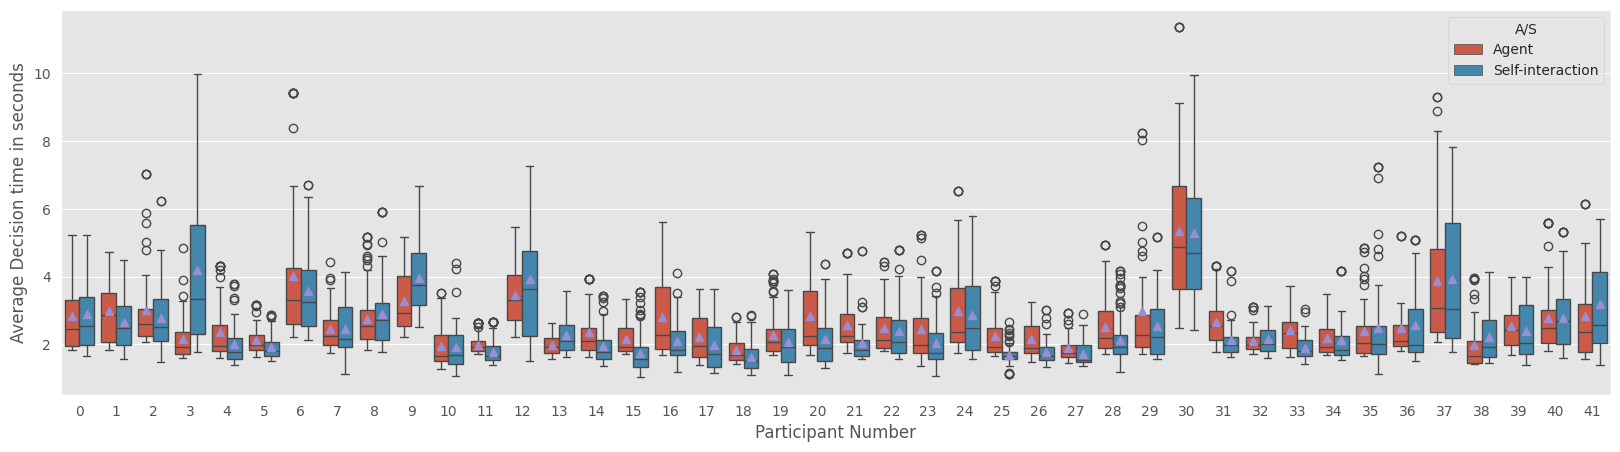

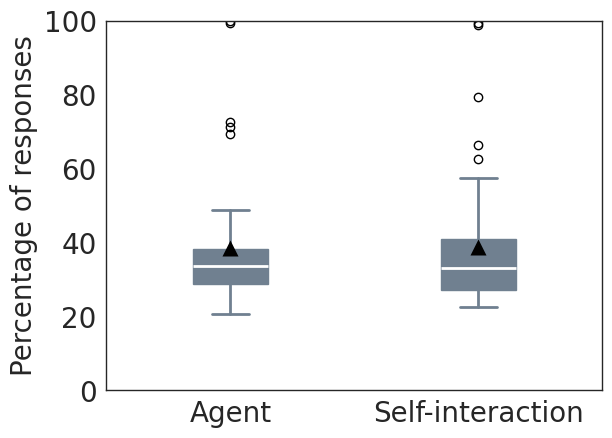

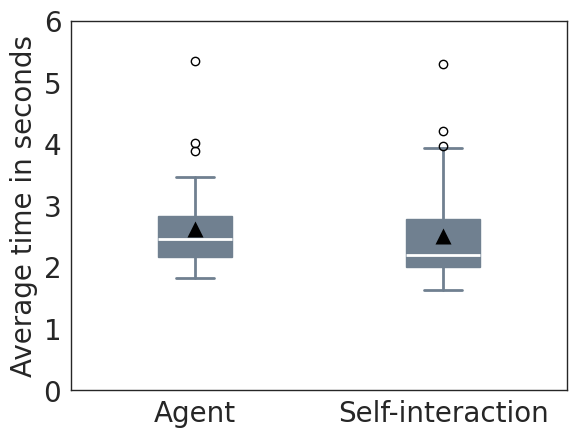

In [13]:
####compare overall response and response time for options selected to video
agent_matching_video = []
agent_avg = []
self_matching_video = []
self_avg = []

part_a = 0
part_s = 0

df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/S'])

for sheet_name, df in agent.items():
  count =0
  sum_time = 0
  for i in df.index:
    if (df['Matches Target'][i] == 'Matches'):
      count=count+1
      sum_time = sum_time + df['Normalized RT'][i]
      df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Agent']
  agent_matching_video.append((count/len(df.index))*100)
  agent_avg.append(sum_time/count)
  part_a = part_a + 1

for sheet_name, df2 in self_int.items():
  count2 =0
  sum_time2 = 0
  for j in df2.index:
    if (df2['Matches Target'][j] == 'Matches'):
      count2=count2+1
      sum_time2 = sum_time2 + df2['Normalized RT'][j]
      df_var.loc[len(df_var.index)] = [part_s, df2['Normalized RT'][j],'Self-interaction']
  self_matching_video.append((count2/len(df.index))*100)
  self_avg.append(sum_time2/count2)
  part_s= part_s +1

#print(agent_matching)
#print(self_matching)
df_chart = pd.DataFrame()
df_chart['Agent'] = agent_matching_video
df_chart['Agent average'] = agent_avg
df_chart['Self-interaction'] = self_matching_video
df_chart['Self-interaction average'] = self_avg

print(df_chart)
print(df_var)
plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart[['Agent', 'Self-interaction']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
#ax1.set_title('Response for when option selected matches the appearance')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.show()

ax2 = df_chart[['Agent average', 'Self-interaction average']].plot(kind='line', figsize=(20,5), legend=True)
#ax2.set_title('Average time for when option selected matches the appearance')
ax2.set(ylim =(0, 6))
ax2.set_xlabel('Participant number')
ax2.set_ylabel('Average decision time in seconds')
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time for when option selected matches the appearance (with errorbars set as Standard Deviation)')
sns.barplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time for when option selected matches the appearance')
sns.boxplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")

sns.set_style("white")

ax4 = df_chart[['Agent', 'Self-interaction']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of responses', fontsize = 20)
#ax4.set_title('When option selected matches the audio')
plt.savefig('Vid-agent-vs-self.png', bbox_inches='tight')
plt.show()

labs = ['Agent', 'Self-interaction']
ax5 = df_chart[['Agent average', 'Self-interaction average']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Average time in seconds', fontsize = 20)
ax5.set_xticklabels(labs)
#ax5.set_title('When option selected matches the audio')
plt.savefig('Vid-agent-vs-self-time.png', bbox_inches='tight')
plt.show()

     Agent  Agent average  Self-interaction  Self-interaction average
0   41.875       3.263265            50.000                  2.966680
1   48.750       2.829821            41.250                  2.969468
2   35.000       3.508188            33.125                  3.219697
3   30.000       2.765768            33.750                  4.181341
4   36.875       2.534881            39.375                  2.253211
5   50.000       2.176459            38.125                  2.084312
6   31.875       4.658791            33.125                  3.688271
7   40.000       2.684952            33.125                  2.465092
8   16.250       3.235220            31.250                  3.405901
9   35.000       3.364617            46.250                  3.998313
10  24.375       2.164217            26.250                  2.419016
11   0.000       0.000000             1.250                  2.365754
12  41.250       3.696004            38.125                  3.872980
13   0.000       0.0

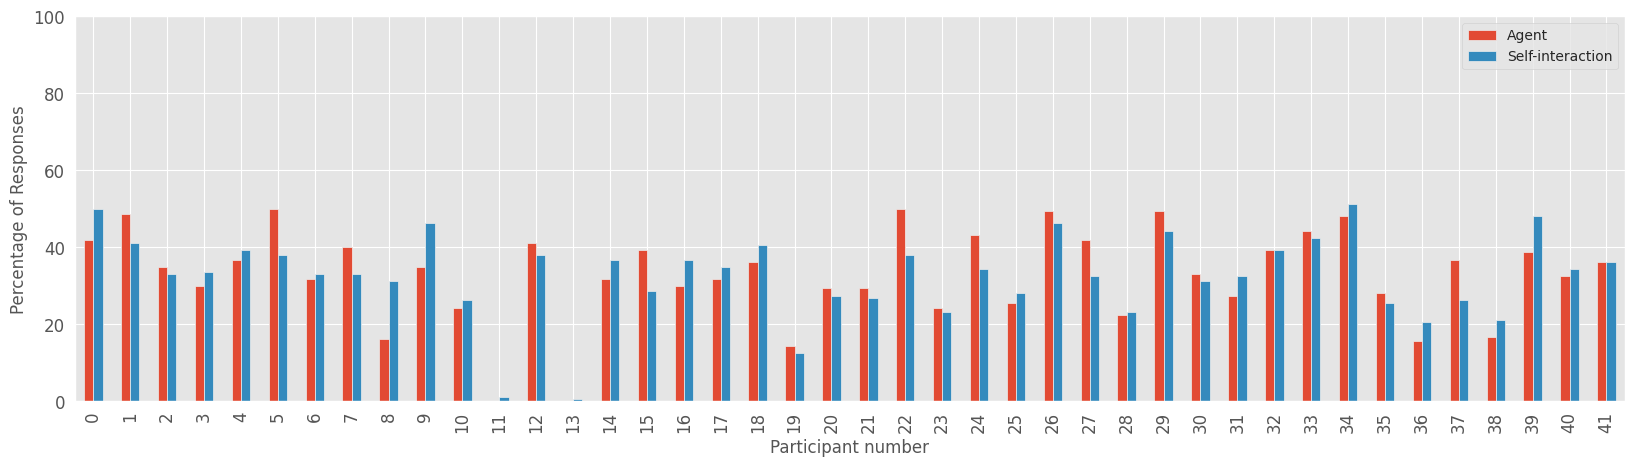

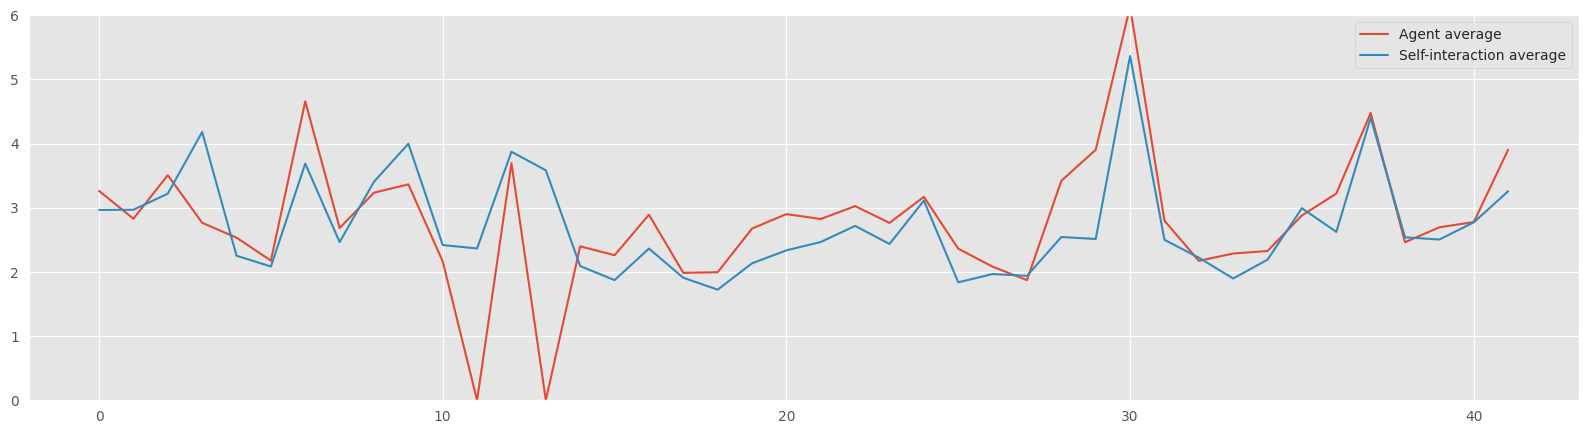

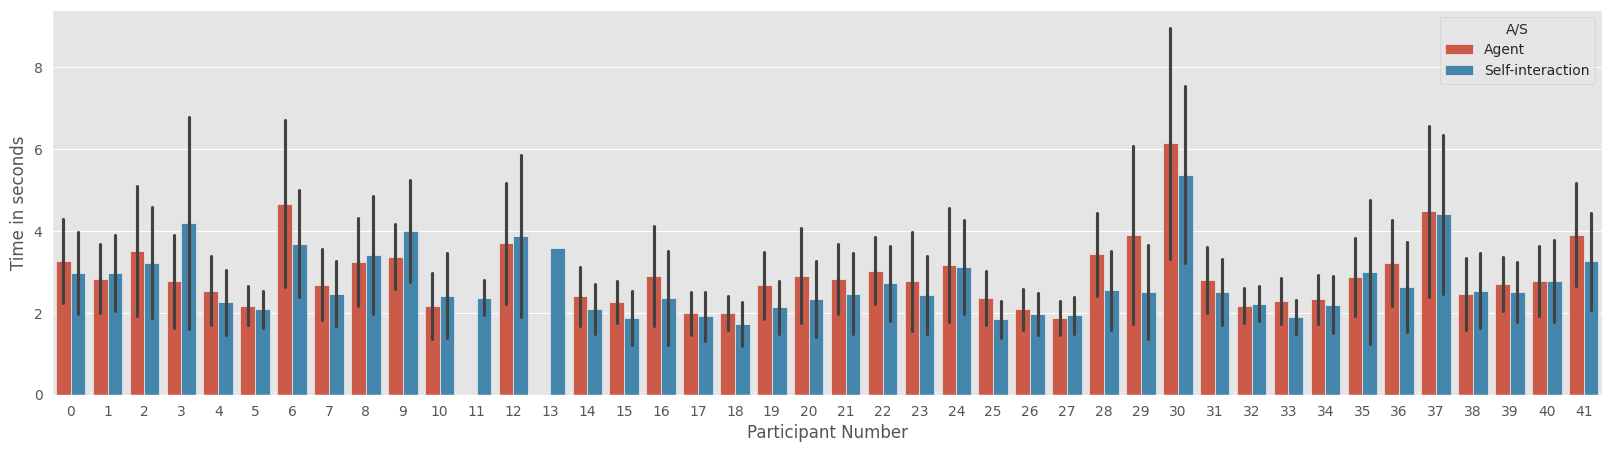

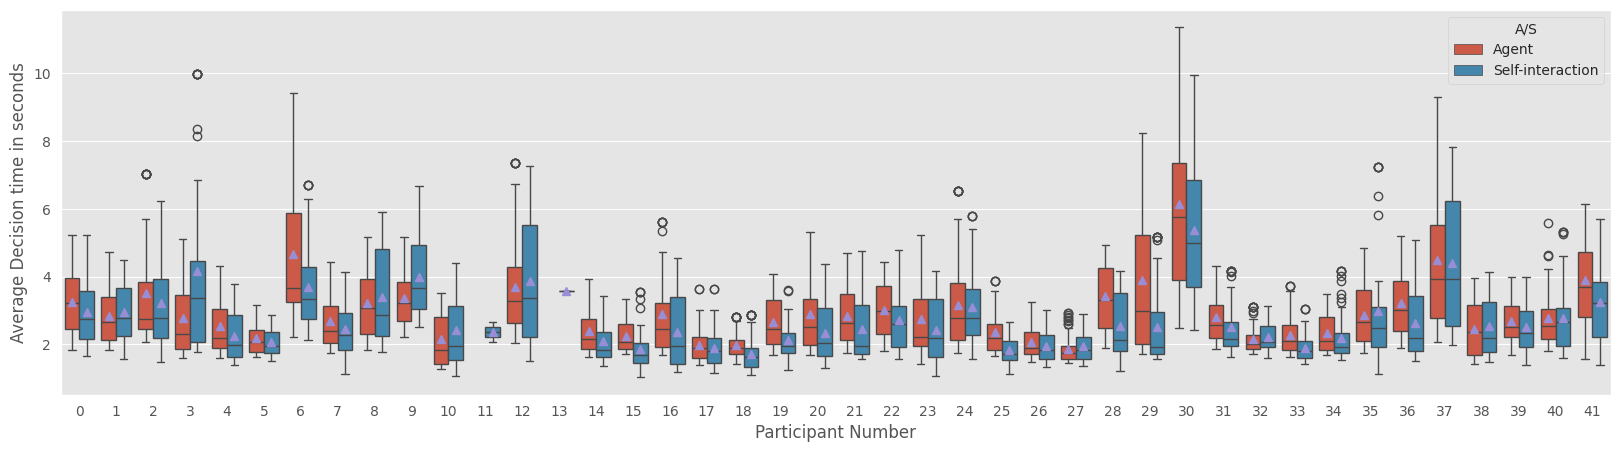

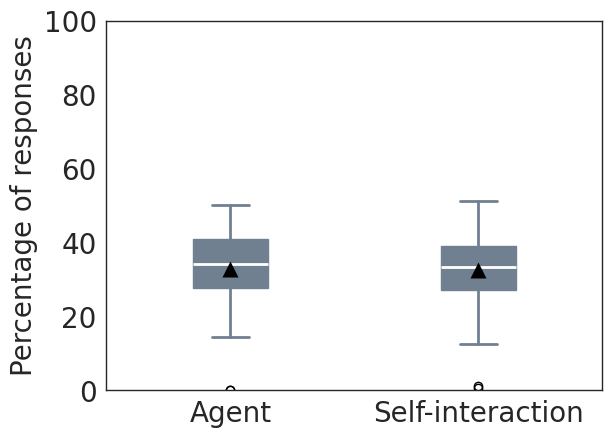

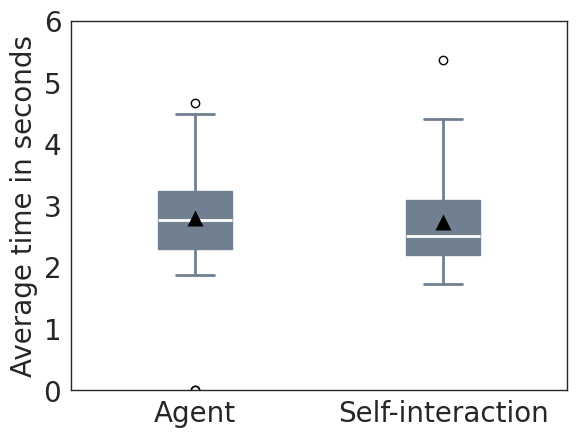

In [14]:
##when it matches neither
agent_matching_video = []
agent_avg = []
self_matching_video = []
self_avg = []

part_a = 0
part_s = 0

df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/S'])

for sheet_name, df in agent.items():
  count =0
  sum_time = 0
  for i in df.index:
    if ((df['Matches Audio'][i] == 'No Match') and (df['Matches Target'][i] == 'No Match')):
      count=count+1
      sum_time = sum_time + df['Normalized RT'][i]
      df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Agent']
  agent_matching_video.append((count/len(df.index))*100)
  if (count == 0):
    agent_avg.append(0)
  else:
    agent_avg.append(sum_time/count)
  part_a = part_a + 1

for sheet_name, df2 in self_int.items():
  count2 =0
  sum_time2 = 0
  for j in df2.index:
    if ((df2['Matches Audio'][j] == 'No Match') and (df2['Matches Target'][j] == 'No Match')):
      count2=count2+1
      sum_time2 = sum_time2 + df2['Normalized RT'][j]
      df_var.loc[len(df_var.index)] = [part_s, df2['Normalized RT'][j],'Self-interaction']
  self_matching_video.append((count2/len(df.index))*100)
  if(count2 == 0):
    self_avg.append(0)
  else:
    self_avg.append(sum_time2/count2)
  part_s= part_s +1

#print(agent_matching)
#print(self_matching)
df_chart = pd.DataFrame()
df_chart['Agent'] = agent_matching_video
df_chart['Agent average'] = agent_avg
df_chart['Self-interaction'] = self_matching_video
df_chart['Self-interaction average'] = self_avg

print(df_chart)
print(df_var)
plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart[['Agent', 'Self-interaction']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
#ax1.set_title('Response for when option selected matches neither')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.show()

ax2 = df_chart[['Agent average', 'Self-interaction average']].plot(kind='line', figsize=(20,5), legend=True)
#ax2.set_title('Average time for when option selected matches neither')
ax2.set(ylim =(0, 6))
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time for when option selected matches neither (with errorbars set as Standard Deviation)')
sns.barplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
ax.set_ylabel('Time in seconds')
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time for when option selected matches neither')
sns.boxplot(data=df_var, x="Participant Number", y="Decision time", hue="A/S", showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")

sns.set_style("white")

ax4 = df_chart[['Agent', 'Self-interaction']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of responses', fontsize = 20)
#ax4.set_title('When option selected matches the audio')
plt.savefig('Nei-agent-vs-self.png', bbox_inches='tight')
plt.show()

labs = ['Agent', 'Self-interaction']
ax5 = df_chart[['Agent average', 'Self-interaction average']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Average time in seconds', fontsize = 20)
ax5.set_xticklabels(labs)
#ax5.set_title('When option selected matches the audio')
plt.savefig('Nei-agent-vs-self-time.png', bbox_inches='tight')
plt.show()

In [15]:
##compare overall response and response time for all participants - matches audio, matches target, doesn't match either
matching_audio_a = []
audio_avg_a = []
matching_video_a = []
video_avg_a = []
matching_none_a = []
none_avg_a = []

part_a = 0
part_s = 0
df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N', 'A/S'])


for sheet_name, df in agent.items():
  count_a = 0
  count_v = 0
  count_n = 0
  sum_time_a = 0
  sum_time_v = 0
  sum_time_n = 0
  for i in df.index:
    if (df['Target'][i] != df['Audio Source'][i]):
      if (df['Matches Audio'][i] == 'Matches'):
        count_a=count_a+1
        sum_time_a = sum_time_a + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Audio','Agent']
      if (df['Matches Target'][i] == 'Matches'):
        count_v=count_v+1
        sum_time_v = sum_time_v + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Video','Agent']
      if ((df['Matches Audio'][i] == 'No Match') & (df['Matches Target'][i] == 'No Match')):
        count_n = count_n+1
        sum_time_n = sum_time_n + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_a, df['Normalized RT'][i],'Neither','Agent']
  matching_audio_a.append((count_a/120)*100)
  matching_video_a.append((count_v/120)*100)
  matching_none_a.append((count_n/120)*100)
  if(count_a != 0):
    audio_avg_a.append(sum_time_a/count_a)
  else:
    audio_avg_a.append(0)
  if(count_v != 0):
    video_avg_a.append(sum_time_v/count_v)
  else:
    video_avg_a.append(0)
  if(count_n != 0):
    none_avg_a.append(sum_time_n/count_n)
  else:
    none_avg_a.append(0)
  part_a=part_a+1

matching_audio_s = []
audio_avg_s = []
matching_video_s = []
video_avg_s = []
matching_none_s = []
none_avg_s = []
for sheet_name, df in self_int.items():
  count_a = 0
  count_v = 0
  count_n = 0
  sum_time_a = 0
  sum_time_v = 0
  sum_time_n = 0
  for i in df.index:
    if (df['Target'][i] != df['Audio Source'][i]):
      if (df['Matches Audio'][i] == 'Matches'):
        count_a=count_a+1
        sum_time_a = sum_time_a + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_s, df['Normalized RT'][i],'Audio','Self-interaction']
      if (df['Matches Target'][i] == 'Matches'):
        count_v=count_v+1
        sum_time_v = sum_time_v + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_s, df['Normalized RT'][i],'Video','Self-interaction']
      if ((df['Matches Audio'][i] == 'No Match') & (df['Matches Target'][i] == 'No Match')):
        count_n=count_n+1
        sum_time_n = sum_time_n + df['Normalized RT'][i]
        df_var.loc[len(df_var.index)] = [part_s, df['Normalized RT'][i],'Neither','Self-interaction']
  matching_audio_s.append((count_a/120)*100)
  matching_video_s.append((count_v/120)*100)
  matching_none_s.append((count_n/120)*100)
  if(count_a != 0):
    audio_avg_s.append(sum_time_a/count_a)
  else:
    audio_avg_s.append(0)
  if(count_v != 0):
    video_avg_s.append(sum_time_v/count_v)
  else:
    video_avg_s.append(0)
  if(count_n != 0):
    none_avg_s.append(sum_time_n/count_n)
  else:
    none_avg_s.append(0)
  part_s=part_s+1


matching_audio = []
audio_avg = []
matching_video = []
video_avg = []
matching_none = []
none_avg= []

for i in range(len(matching_audio_a)):
  matching_audio.append((matching_audio_a[i]+matching_audio_s[i])/2)
  audio_avg.append((audio_avg_a[i]+audio_avg_s[i])/2)
  matching_video.append((matching_video_a[i]+matching_video_s[i])/2)
  video_avg.append((video_avg_a[i]+video_avg_s[i])/2)
  matching_none.append((matching_none_a[i]+matching_none_s[i])/2)
  none_avg.append((none_avg_a[i]+none_avg_s[i])/2)

#print(matching_audio)
#print(audio_avg)
#print(matching_video)


    Matching Audio  Matching Video  Matching Neither
0        37.916667       15.833333         46.250000
1        25.000000       30.833333         44.166667
2        41.666667       28.333333         30.000000
3        50.416667       11.250000         38.333333
4        35.833333       25.833333         38.333333
5        27.916667       27.083333         45.000000
6        32.916667       31.250000         35.833333
7        38.333333       24.166667         37.500000
8        15.833333       62.916667         21.250000
9        44.166667       16.666667         39.166667
10       63.333333       21.250000         15.416667
11        0.416667       99.166667          0.416667
12       48.750000       16.666667         34.583333
13        0.000000       99.583333          0.416667
14       42.083333       20.833333         37.083333
15       14.166667       53.750000         32.083333
16       47.500000       22.500000         30.000000
17       47.083333       15.833333         37.

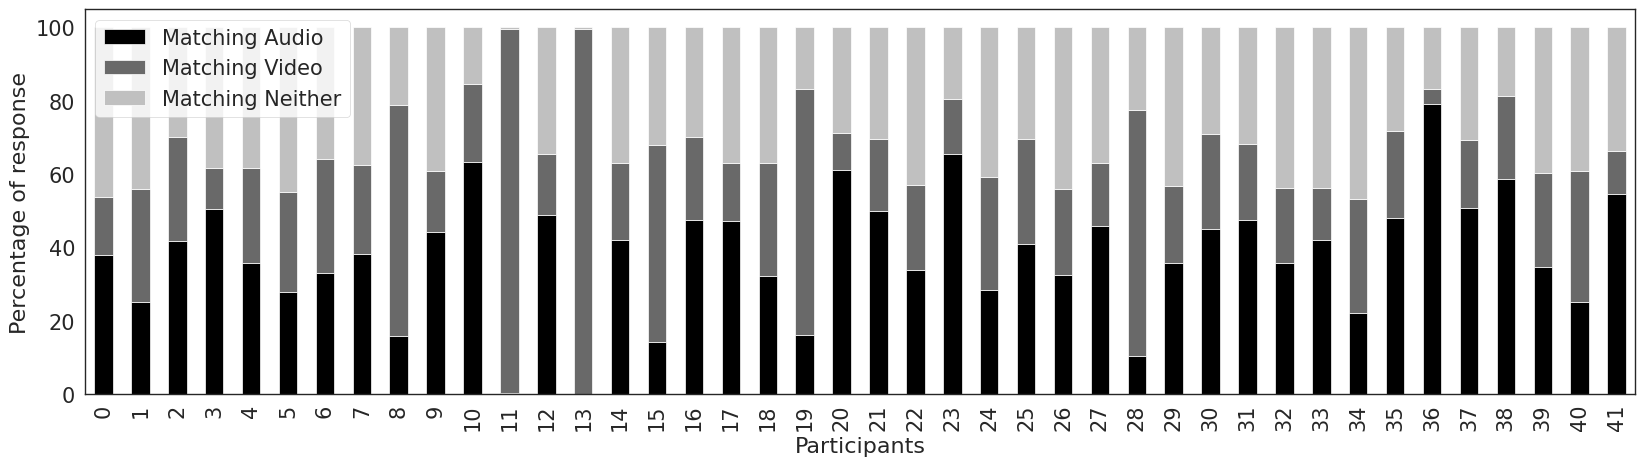

    Matching Audio  Audio average  Matching Target  Target average  \
0        37.916667       2.690246        15.833333        3.178625   
1        25.000000       2.816887        30.833333        2.880411   
2        41.666667       3.069165        28.333333        3.135033   
3        50.416667       3.157431        11.250000        3.288222   
4        35.833333       2.071364        25.833333        2.292533   
5        27.916667       2.140070        27.083333        2.016026   
6        32.916667       3.574312        31.250000        4.384004   
7        38.333333       2.520063        24.166667        2.535167   
8        15.833333       3.099939        62.916667        2.747994   
9        44.166667       3.635653        16.666667        3.912732   
10       63.333333       1.891623        21.250000        2.001820   
11        0.416667       0.865661        99.166667        1.882756   
12       48.750000       3.216536        16.666667        3.864281   
13        0.000000  

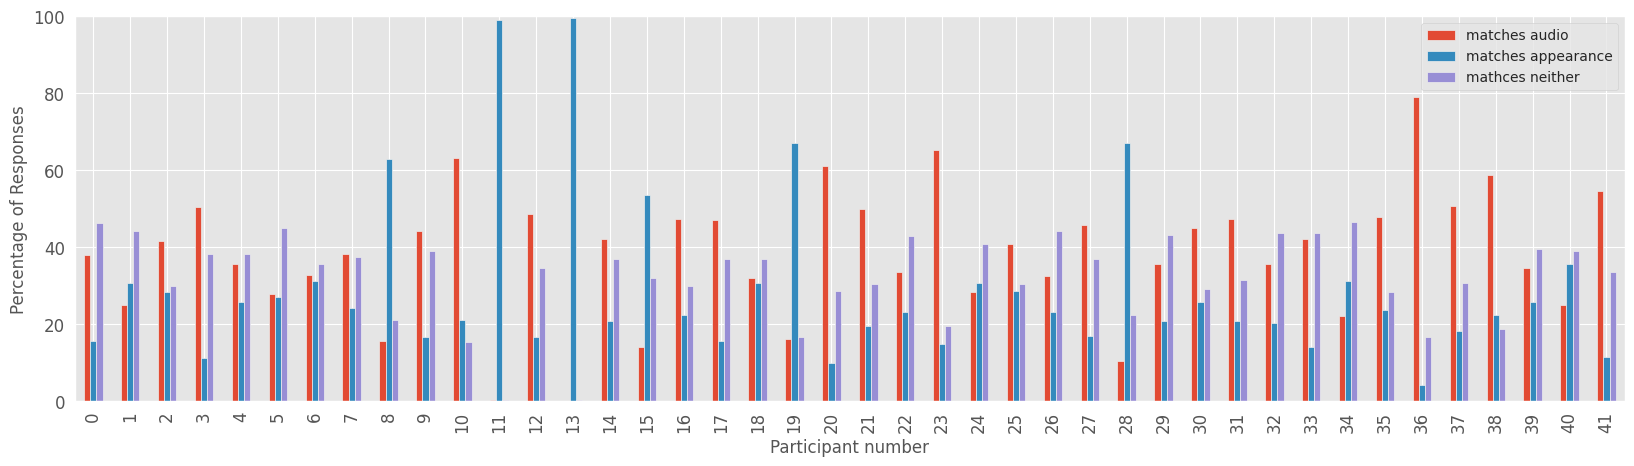

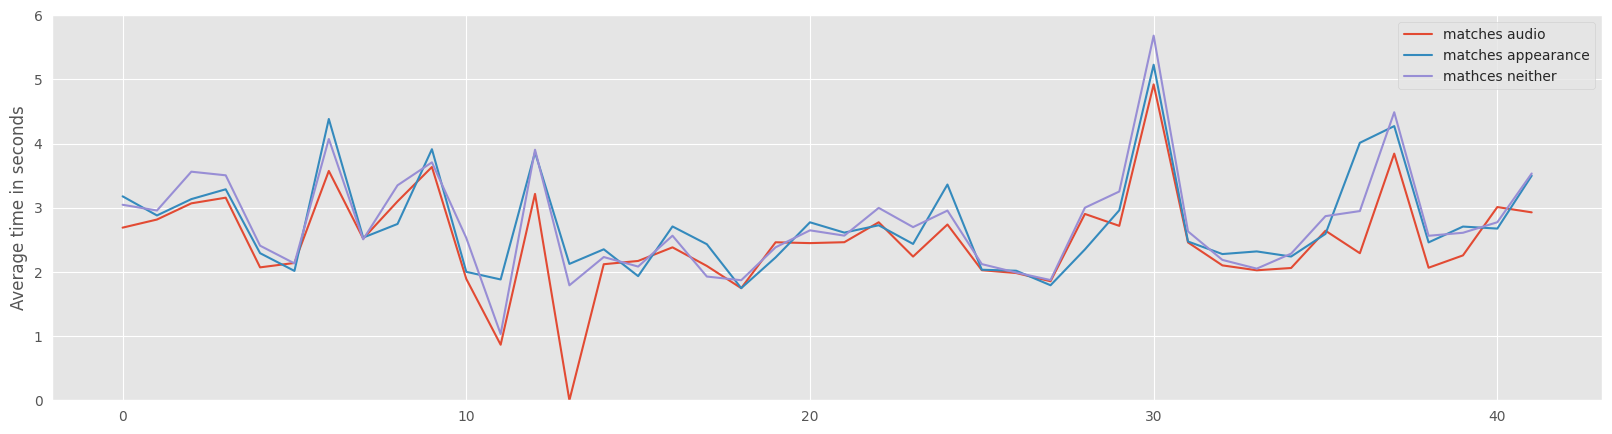

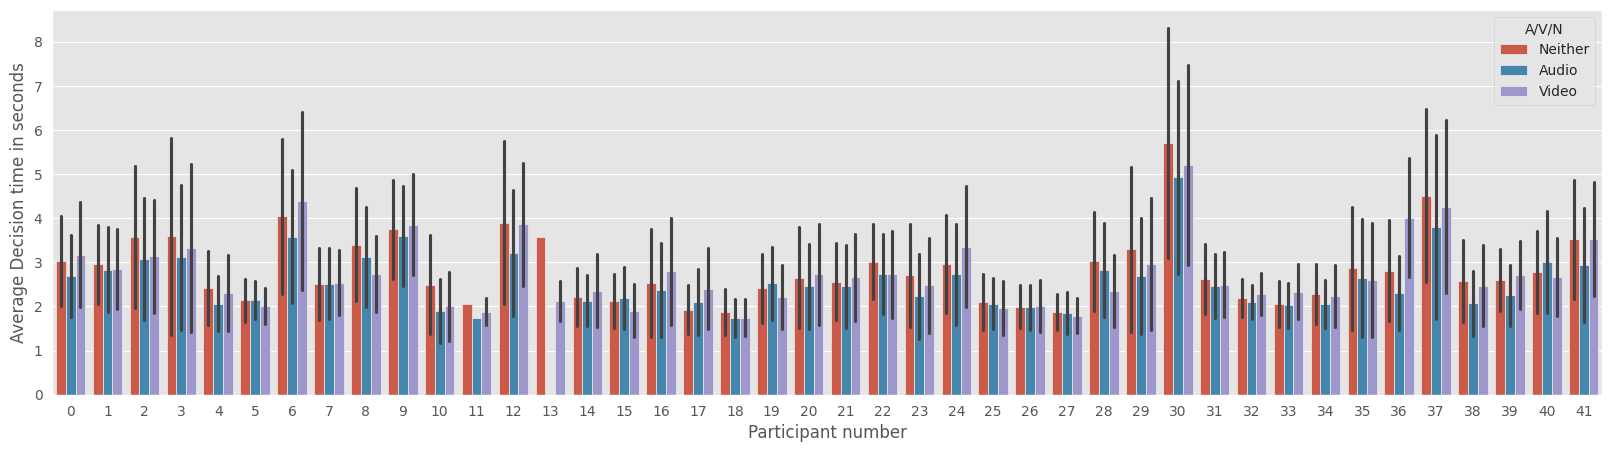

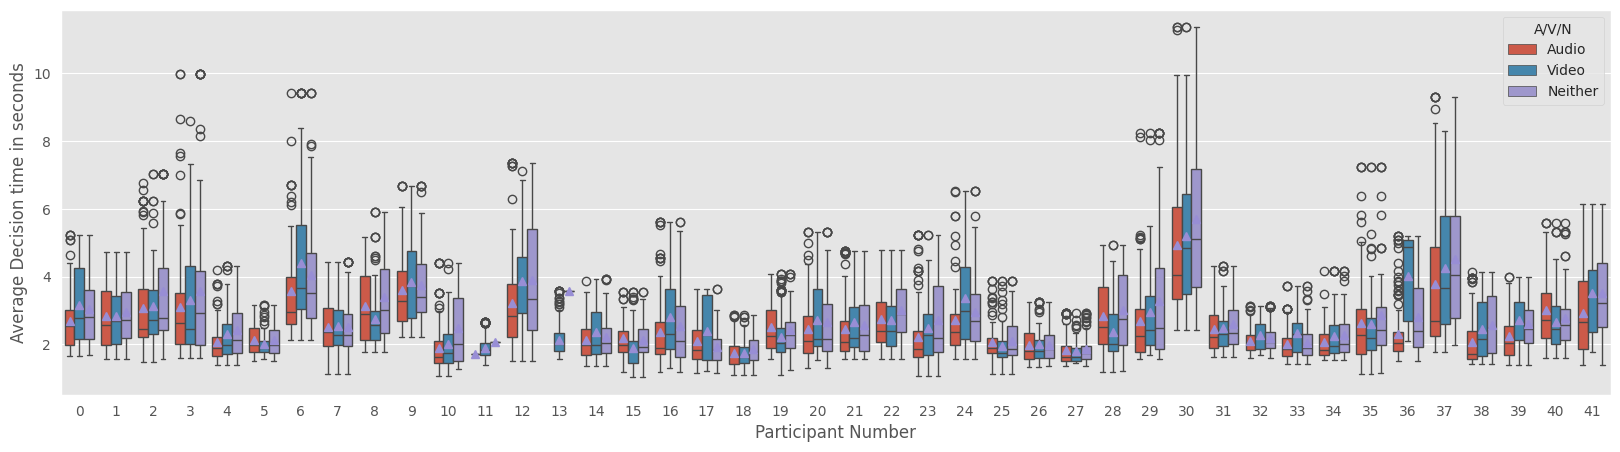

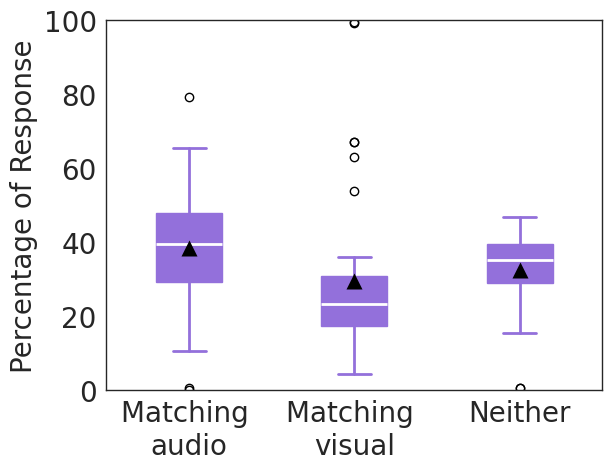

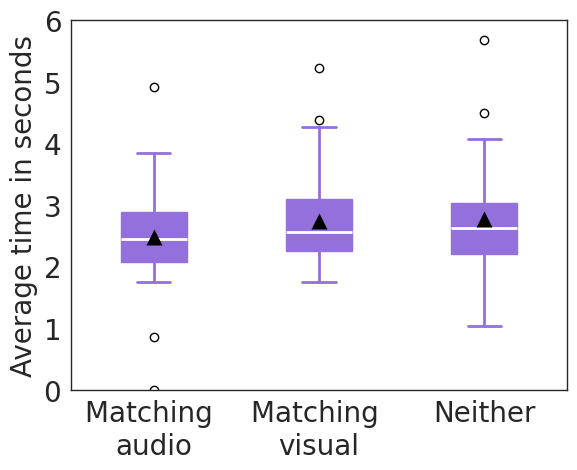

In [16]:
##dataframes and plots
import matplotlib.pyplot as plt
df_stacked = pd.DataFrame()
# create data
lst = list(range(0, 42))

df_stacked['Matching Audio'] = matching_audio
df_stacked['Matching Video'] = matching_video
df_stacked['Matching Neither'] = matching_none
print(df_stacked)
color = ('black', 'dimgrey', 'silver')
ax44 = df_stacked.plot(kind='bar', stacked=True,  use_index=True, figsize=(20,5), legend=True, fontsize=15, color = color)
ax44.legend(prop={'size': 15})
ax44.set_ylabel('Percentage of response', fontsize=16)
ax44.set_xlabel('Participants',fontsize=16)
plt.show()
df_chart_all = pd.DataFrame()
df_chart_all['Matching Audio'] = matching_audio
df_chart_all['Audio average'] = audio_avg
df_chart_all['Matching Target'] = matching_video
df_chart_all['Target average'] = video_avg
df_chart_all['Matching Neither'] = matching_none
df_chart_all['Neither average'] = none_avg

mylabels = ['matches audio', 'matches appearance', 'mathces neither']


print(df_chart_all)
print(df_var)
plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart_all[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.legend(labels=mylabels)
#ax1.set_title('Response overall for when option selected matches audio/video/neither')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.show()

ax2 = df_chart_all[['Audio average', 'Target average', 'Neither average']].plot(kind='line', figsize=(20,5), legend=True)
#ax2.set_title('Average time overall')
ax2.legend(labels=mylabels)
ax2.set_ylabel('Average time in seconds')
ax2.set(ylim =(0, 6))
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time overall (with errorbars set as Standard Deviation)')
ax.legend(labels=mylabels)
sns.barplot(data=df_var, x="Participant Number", y="Decision time", hue="A/V/N", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
ax.set_xlabel('Participant number')
plt.show()

myord = ["Audio", "Video", "Neither"]

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time overall')
sns.boxplot(x="Participant Number", y="Decision time", data=df_var,  hue="A/V/N", hue_order= myord, showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")
#ax6.legend(loc="upper left", ncol = 3, labels=mylabels)



sns.set_style("white")

ax4 = df_chart_all[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='box', legend=True, widths = 0.4, fontsize=20, showmeans=True, patch_artist = True,
                               boxprops = dict(facecolor = "mediumpurple", color = 'mediumpurple'), medianprops = dict(color = "white", linewidth = 2),
                               meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
                               whiskerprops = dict(color = "mediumpurple", linewidth = 2), capprops = dict(color = "mediumpurple", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('Audio vs Appearance vs Neither')
labels = ['Matching \naudio', 'Matching \nvisual', 'Neither']
#ax4.text(0.85, 0.95, '(n=42)' , transform=ax.transAxes, fontsize=20)
ax4.set_ylabel('Percentage of Response', fontsize = 20)
#ax4.set_title('Response overall')
ax4.set_xticklabels(labels)
#plt.setp(ax4.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.savefig('Aud-vid-none.png', bbox_inches='tight')
plt.show()

ax5 = df_chart_all[['Audio average', 'Target average', 'Neither average']].plot(kind='box', legend=True, widths = 0.4, fontsize=20, showmeans=True, patch_artist = True,
                               boxprops = dict(facecolor = "mediumpurple", color = 'mediumpurple'), medianprops = dict(color = "white", linewidth = 2),
                               meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
                               whiskerprops = dict(color = "mediumpurple", linewidth = 2), capprops = dict(color = "mediumpurple", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Audio vs Appearance vs Neither')
ax5.set_ylabel('Average time in seconds',fontsize = 20)
labels = ['Matching \naudio', 'Matching \nvisual', 'Neither']
ax5.set_xticklabels(labels)
#ax5.set_title('Response and average time overall')
plt.savefig('Aud-vid-none-time.png', bbox_inches='tight')
plt.show()

In [19]:
#df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N', 'A/S'])
df_var_a = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N'])
df_var_s = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N'])

for i in df_var.index:
  if(df_var['A/S'][i] == 'Agent'):
    df_var_a.loc[len(df_var_a.index)] = [df_var['Participant Number'][i], df_var['Decision time'][i], df_var['A/V/N'][i]]
  elif (df_var['A/S'][i] == 'Self-interaction'):
    df_var_s.loc[len(df_var_s.index)] = [df_var['Participant Number'][i], df_var['Decision time'][i], df_var['A/V/N'][i]]

print(df_var)
print(df_var_a)
print(df_var_s)

       Participant Number  Decision time    A/V/N               A/S
0                       0       5.224228  Neither             Agent
1                       0       2.428312  Neither             Agent
2                       0       2.182953  Neither             Agent
3                       0       2.337143    Audio             Agent
4                       0       3.168480    Audio             Agent
...                   ...            ...      ...               ...
10075                  41       1.792023  Neither  Self-interaction
10076                  41       1.394379  Neither  Self-interaction
10077                  41       1.822540    Audio  Self-interaction
10078                  41       3.219025  Neither  Self-interaction
10079                  41       1.839142    Audio  Self-interaction

[10080 rows x 4 columns]
      Participant Number  Decision time    A/V/N
0                      0       5.224228  Neither
1                      0       2.428312  Neither
2          

    Matching Audio  Audio average  Matching Target  Target average  \
0        39.166667       2.824648        18.333333        3.134569   
1        26.666667       2.987758        27.500000        3.140938   
2        35.833333       3.030945        32.500000        3.117690   
3        55.000000       2.658739        10.833333        2.367498   
4        32.500000       2.192328        28.333333        2.423152   
5        26.666667       2.091253        25.833333        2.103222   
6        34.166667       3.600404        31.666667        4.767356   
7        37.500000       2.578744        24.166667        2.601603   
8        16.666667       3.588837        70.000000        2.693197   
9        49.166667       3.258379        18.333333        3.319885   
10       60.833333       1.888508        22.500000        1.954571   
11        0.833333       1.731323        99.166667        1.984442   
12       47.500000       3.321155        17.500000        3.795031   
13        0.000000  

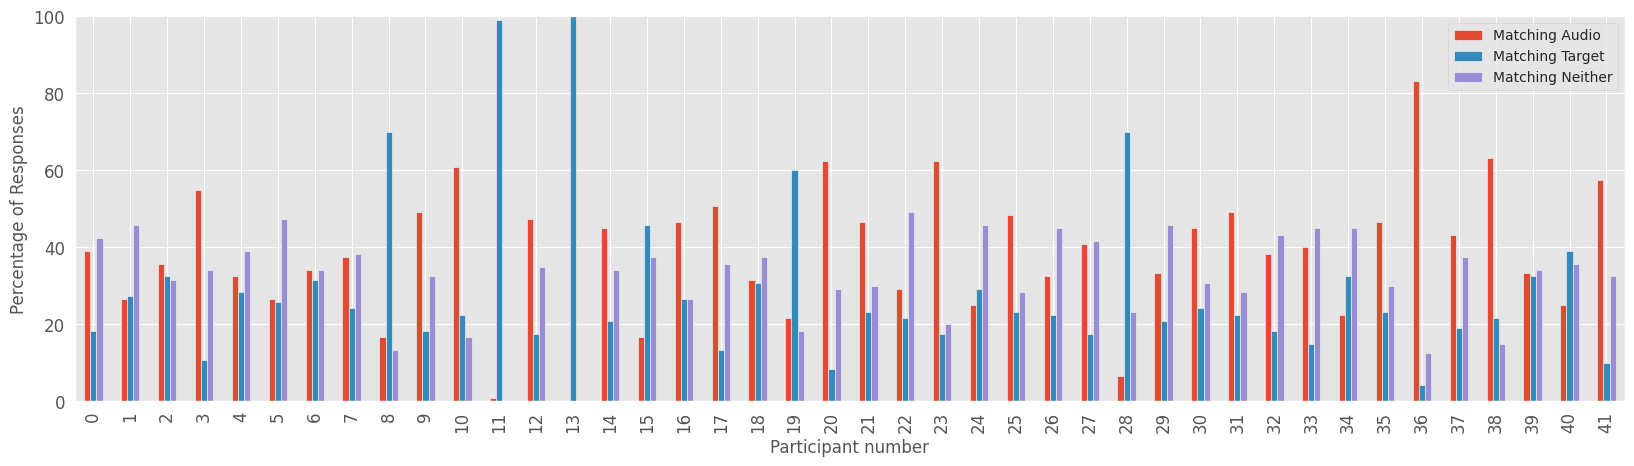

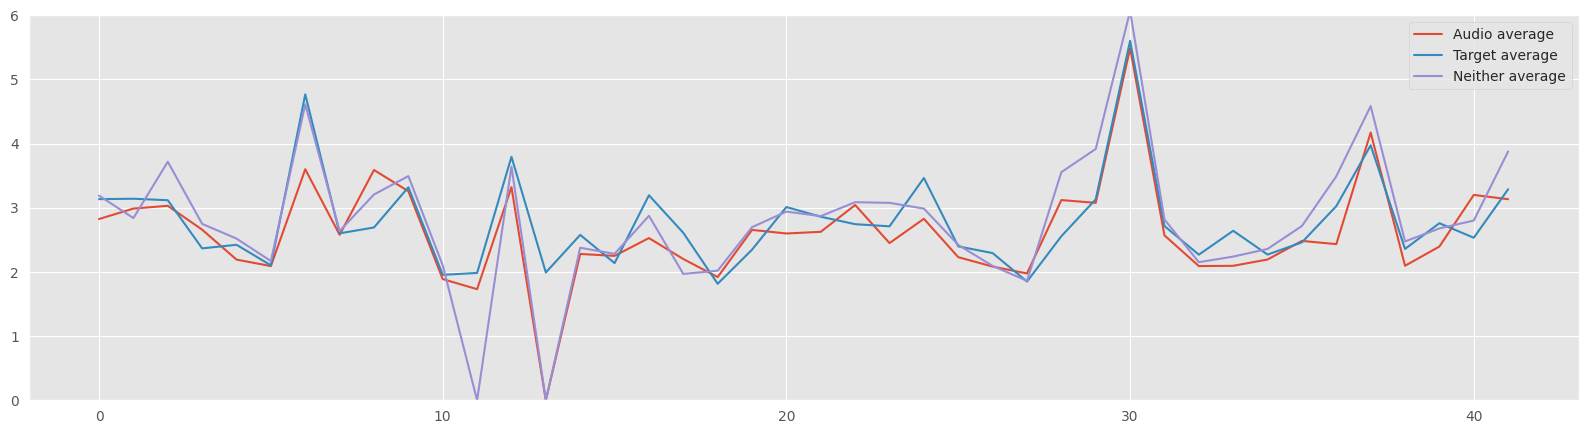

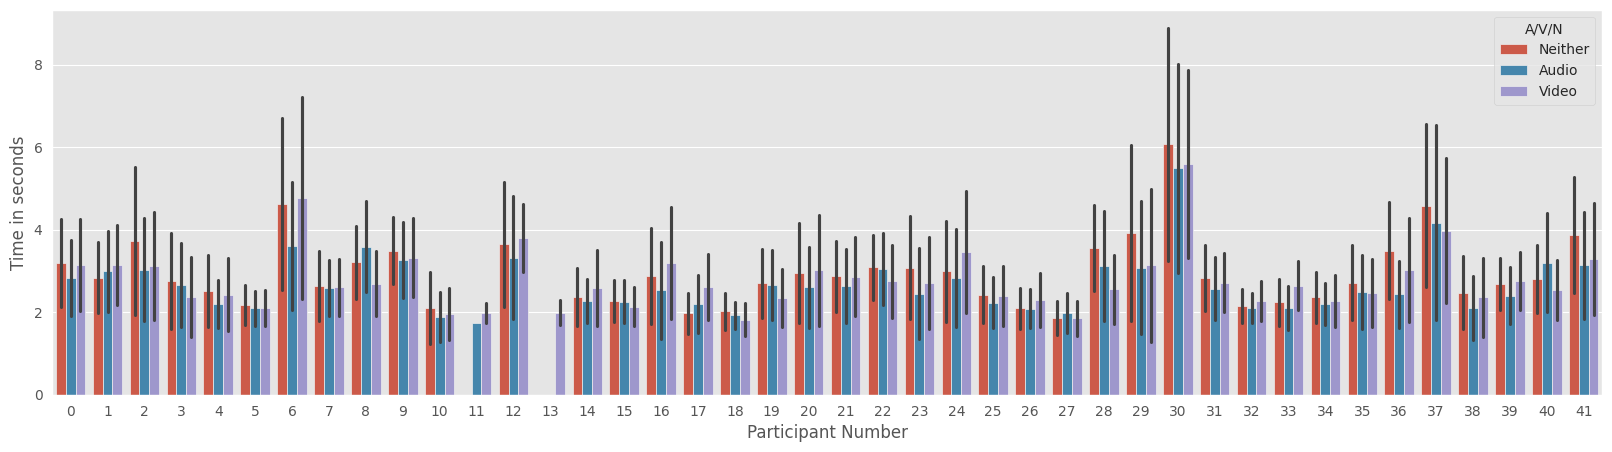

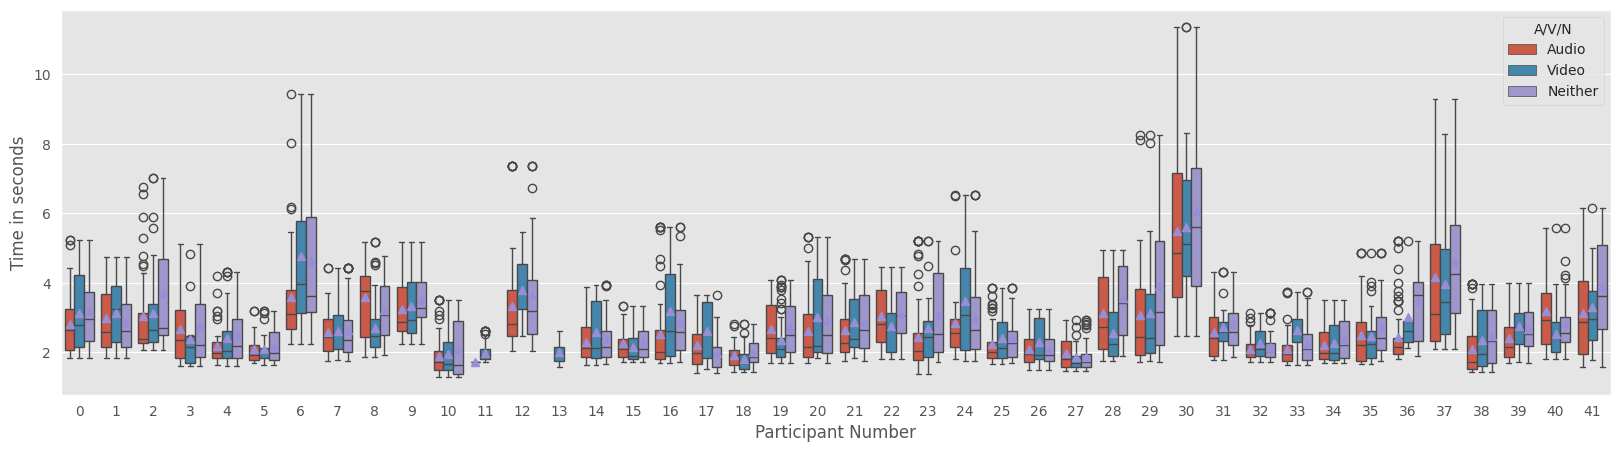

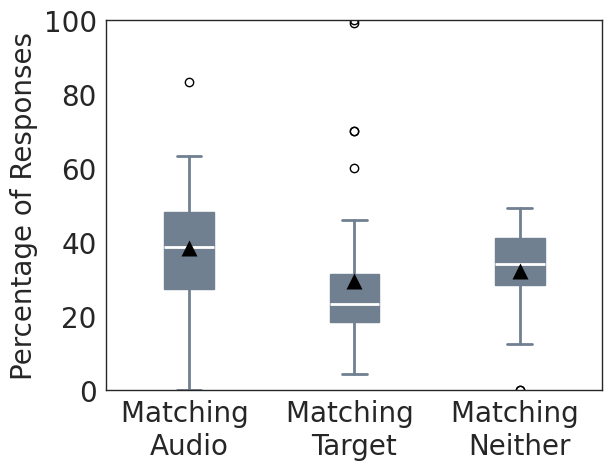

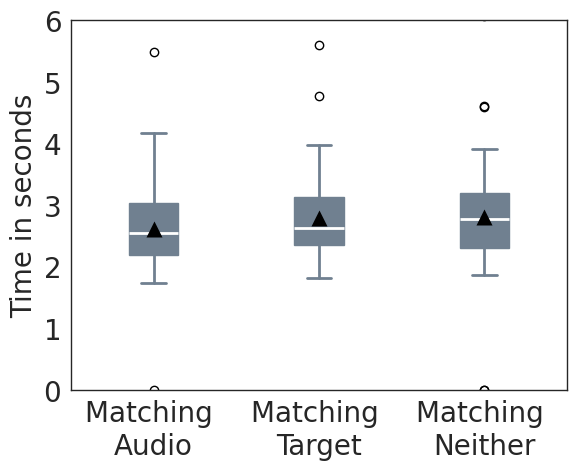

In [20]:


##dataframes and plots for just agent
df_chart_a = pd.DataFrame()
df_chart_a['Matching Audio'] = matching_audio_a
df_chart_a['Audio average'] = audio_avg_a
df_chart_a['Matching Target'] = matching_video_a
df_chart_a['Target average'] = video_avg_a
df_chart_a['Matching Neither'] = matching_none_a
df_chart_a['Neither average'] = none_avg_a

agent_means=[df_chart_a['Matching Audio'].sum()/42, df_chart_a['Matching Target'].sum()/42, df_chart_a['Matching Neither'].sum()/42]
agent_avg_means=[df_chart_a['Audio average'].sum()/42, df_chart_a['Target average'].sum()/42,df_chart_a['Neither average'].sum()/42]


print(df_chart_a)
print(df_var_a)

plt.style.use('ggplot')

ax1 = df_chart_a[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
#ax1.set_title('Response for agent interaction')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.show()

ax2 = df_chart_a[['Audio average', 'Target average', 'Neither average']].plot(kind='line', figsize=(20,5), legend=True)
#ax2.set_title('Response and average time for agent interaction overal')
ax2.set(ylim =(0, 6))
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time during Agent interaction (with errorbars set as Standard Deviation)')
sns.barplot(data=df_var_a, x="Participant Number", y="Decision time", hue="A/V/N", errorbar="sd")
ax.set_ylabel("Time in seconds")
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time during Agent interaction')
sns.boxplot(data=df_var_a, x="Participant Number", y="Decision time", hue="A/V/N", hue_order= ["Audio", "Video", "Neither"], showmeans=True)
ax6.set_ylabel("Time in seconds")

sns.set_style("white")
labels = ['Matching \nAudio', 'Matching \nTarget', 'Matching \nNeither']

ax4 = df_chart_a[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 100))
ax4.set_xticklabels(labels)
#ax4.set_xlabel('Audio vs Video vs Neither')
ax4.set_ylabel('Percentage of Responses', fontsize=20)
#ax4.set_title('Response for agent interaction overall')
plt.savefig('Matching-aud-vis-nei-agent.png', bbox_inches='tight')
plt.show()

ax5 = df_chart_a[['Audio average', 'Target average', 'Neither average']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Audio vs Video vs Neither')
ax5.set_xticklabels(labels)
ax5.set_ylabel('Time in seconds', fontsize=20)
#ax5.set_title('Average time for agent interaction overall')
plt.savefig('Matching-aud-vis-nei-agent-time.png', bbox_inches='tight')
plt.show()



    Matching Audio  Audio average  Matching Target  Target average  \
0        36.666667       2.555844        13.333333        3.222681   
1        23.333333       2.646015        34.166667        2.619883   
2        47.500000       3.107385        24.166667        3.152375   
3        45.833333       3.656122        11.666667        4.208947   
4        39.166667       1.950400        23.333333        2.161913   
5        29.166667       2.188887        28.333333        1.928830   
6        31.666667       3.548220        30.833333        4.000653   
7        39.166667       2.461382        24.166667        2.468731   
8        15.000000       2.611040        55.833333        2.802790   
9        39.166667       4.012926        15.000000        4.505578   
10       65.833333       1.894738        20.000000        2.049069   
11        0.000000       0.000000        99.166667        1.781071   
12       50.000000       3.111916        15.833333        3.933531   
13        0.000000  

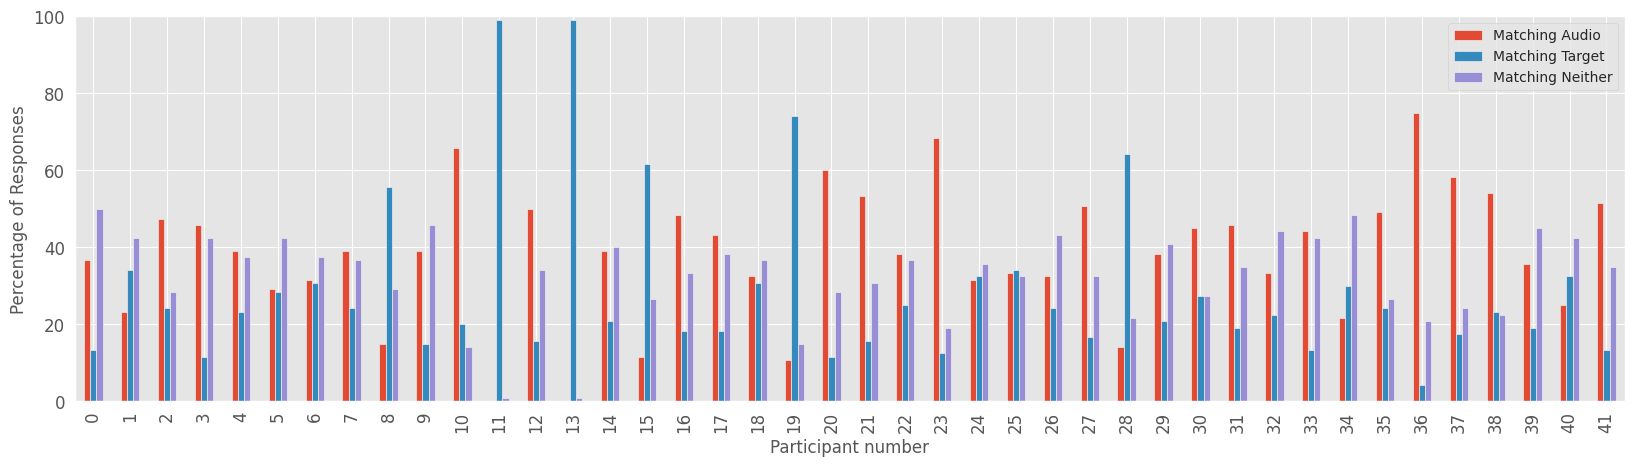

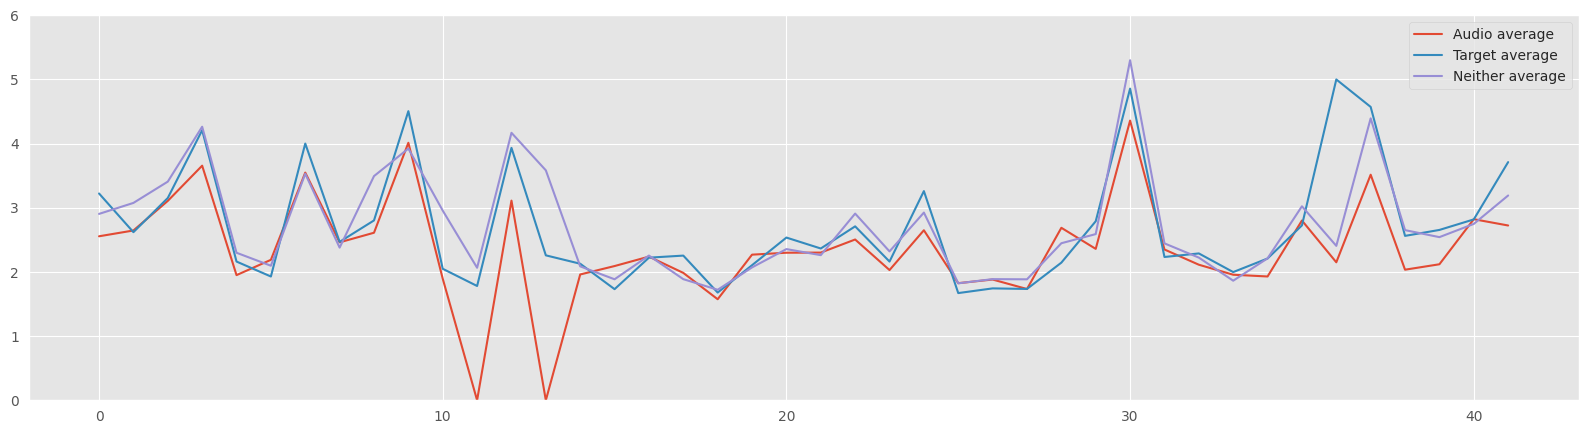

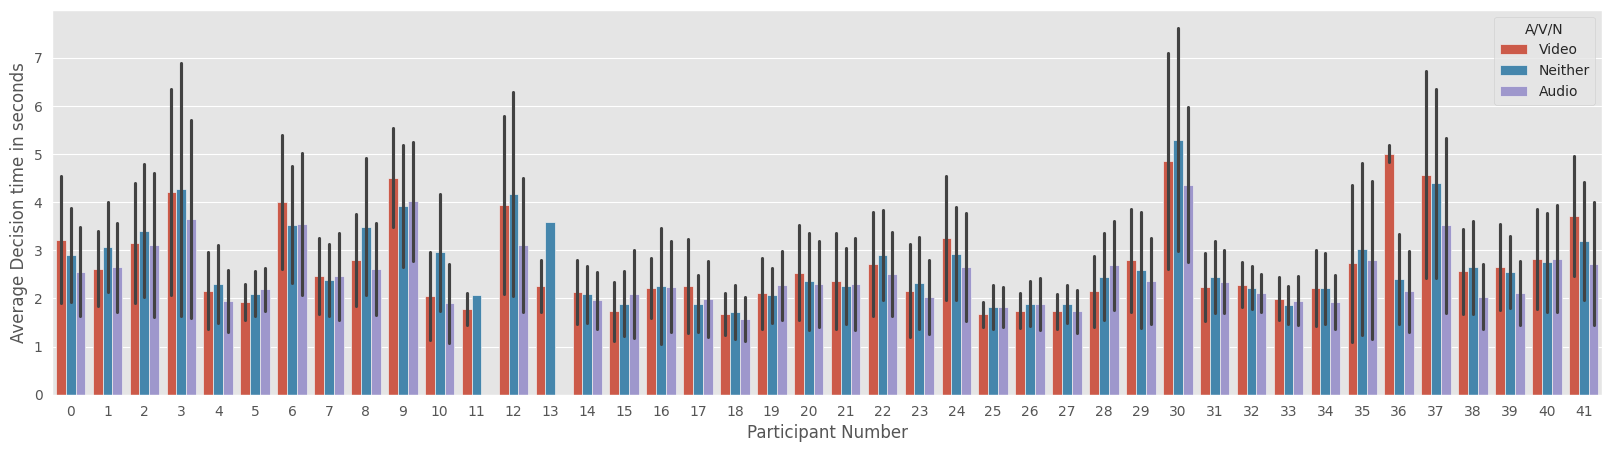

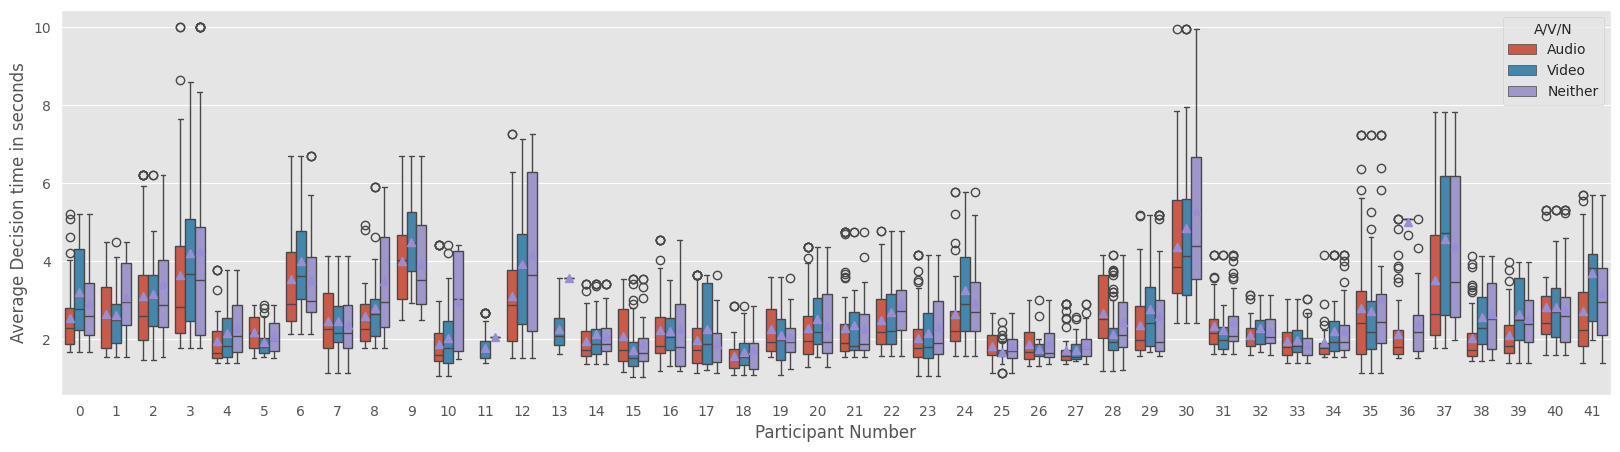

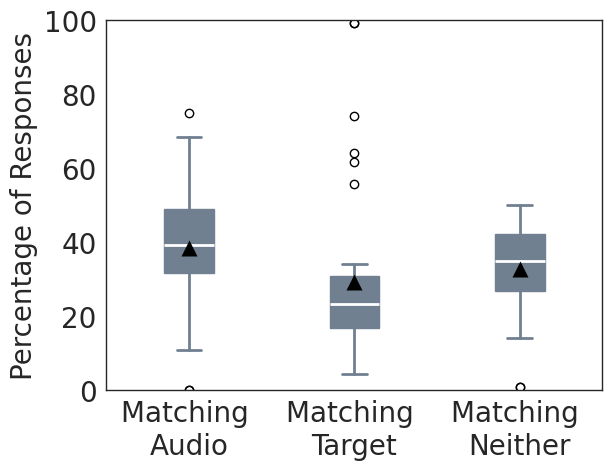

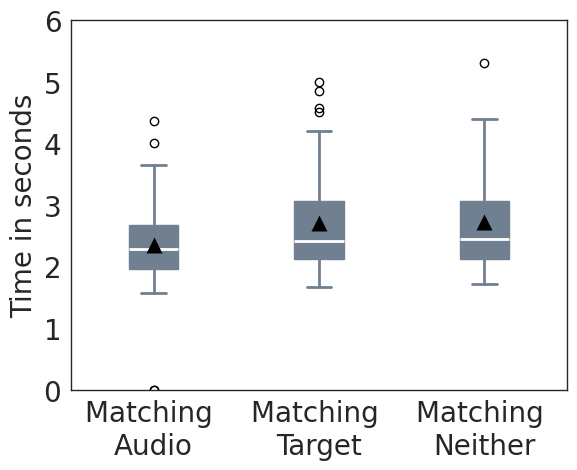

In [18]:
##dataframes and plots for self
df_chart_s = pd.DataFrame()
df_chart_s['Matching Audio'] = matching_audio_s
df_chart_s['Audio average'] = audio_avg_s
df_chart_s['Matching Target'] = matching_video_s
df_chart_s['Target average'] = video_avg_s
df_chart_s['Matching Neither'] = matching_none_s
df_chart_s['Neither average'] = none_avg_s

self_means=[df_chart_s['Matching Audio'].sum()/42, df_chart_s['Matching Target'].sum()/42, df_chart_s['Matching Neither'].sum()/42]
self_avg_means=[df_chart_s['Audio average'].sum()/42, df_chart_s['Target average'].sum()/42,df_chart_s['Neither average'].sum()/42]


print(df_chart_s)
print(df_var_s)

plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart_s[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
#ax1.set_title('Response for self-interaction overall')
plt.show()

ax2 = df_chart_s[['Audio average', 'Target average', 'Neither average']].plot(kind='line', figsize=(20,5), legend=True)
#ax2.set_title('Response and average time for self-interaction overall')
ax2.set(ylim =(0, 6))
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
#ax.set_title('Average time during Self-interaction (with errorbars set as Standard Deviation)')
sns.barplot(data=df_var_s, x="Participant Number", y="Decision time", hue="A/V/N", errorbar="sd")
ax.set_ylabel("Average Decision time in seconds")
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time during Self-interaction')
sns.boxplot(data=df_var_s, x="Participant Number", y="Decision time", hue="A/V/N", hue_order= ["Audio", "Video", "Neither"], showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")


sns.set_style("white")
labels = ['Matching \nAudio', 'Matching \nTarget', 'Matching \nNeither']

ax4 = df_chart_s[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax4.set(ylim =(0, 100))
ax4.set_xticklabels(labels)

#ax4.set_xlabel('Audio vs Video vs Neither')
ax4.set_ylabel('Percentage of Responses', fontsize=20)
#ax4.set_title('Response for agent interaction overall')
plt.savefig('Matching-aud-vis-nei-self.png', bbox_inches='tight')
plt.show()

ax5 = df_chart_s[['Audio average', 'Target average', 'Neither average']].plot(kind='box', legend=True, fontsize=20, showmeans=True, widths=0.3, patch_artist = True,
           boxprops = dict(facecolor = "slategrey", color = 'slategrey'), medianprops = dict(color = "white", linewidth = 2),
           meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
           whiskerprops = dict(color = "slategrey", linewidth = 2), capprops = dict(color = "slategrey", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Audio vs Video vs Neither')
ax5.set_xticklabels(labels)
ax5.set_ylabel('Time in seconds', fontsize=20)
#ax5.set_title('Average time for agent interaction overall')
plt.savefig('Matching-aud-vis-nei-self-time.png', bbox_inches='tight')
plt.show()

In [21]:
##Average analysis

    Matching Audio  Audio average  Matching Target  Target average  \
0        37.916667       2.690246        15.833333        3.178625   
1        25.000000       2.816887        30.833333        2.880411   
2        41.666667       3.069165        28.333333        3.135033   
3        50.416667       3.157431        11.250000        3.288222   
4        35.833333       2.071364        25.833333        2.292533   
5        27.916667       2.140070        27.083333        2.016026   
6        32.916667       3.574312        31.250000        4.384004   
7        38.333333       2.520063        24.166667        2.535167   
8        15.833333       3.099939        62.916667        2.747994   
9        44.166667       3.635653        16.666667        3.912732   
10       63.333333       1.891623        21.250000        2.001820   
11        0.416667       0.865661        99.166667        1.882756   
12       48.750000       3.216536        16.666667        3.864281   
13        0.000000  

Text(0, 0.5, 'Time in seconds')

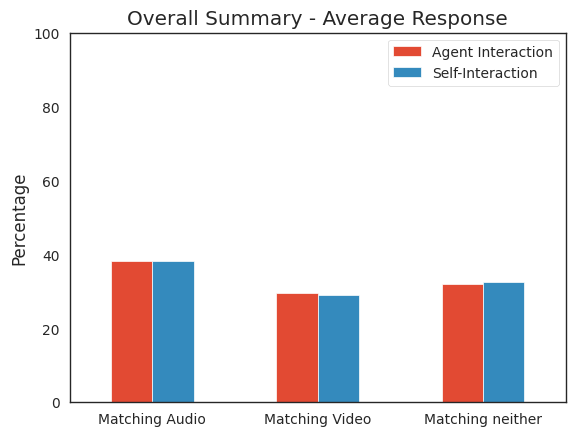

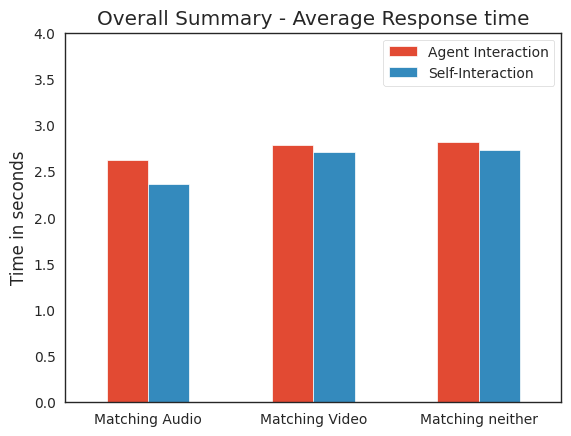

In [23]:
print(df_chart_all)
df_all_desc=df_chart_all.describe()
df_chart_all.describe()

print(df_chart_a)
df_a_desc=df_chart_a.describe()
df_chart_a.describe()

print(df_chart_s)
df_s_desc=df_chart_s.describe()
df_chart_s.describe()

df_compare_desc = pd.DataFrame()

df_compare_desc['Agent Matching Audio'] = df_a_desc['Matching Audio']
df_compare_desc['Self Matching Audio'] = df_s_desc['Matching Audio']

df_compare_desc['Agent Audio average'] = df_a_desc['Audio average']
df_compare_desc['Self Audio average'] = df_s_desc['Audio average']

df_compare_desc['Agent Matching Target'] = df_a_desc['Matching Target']
df_compare_desc['Self Matching Target'] = df_s_desc['Matching Target']

df_compare_desc['Agent Target average'] = df_a_desc['Target average']
df_compare_desc['Self Target average'] = df_s_desc['Target average']

df_compare_desc['Agent Matching Neither'] = df_a_desc['Matching Neither']
df_compare_desc['Self Matching Neither'] =df_s_desc['Matching Neither']


df_compare_desc['Agent Neither average'] = df_a_desc['Neither average']
df_compare_desc['Self Neither average'] = df_s_desc['Neither average']

print(df_compare_desc)


Agent_Interaction = [df_compare_desc['Agent Matching Audio']['mean'], df_compare_desc['Agent Matching Target']['mean'], df_compare_desc['Agent Matching Neither']['mean']]
Self_Interaction = [df_compare_desc['Self Matching Audio']['mean'], df_compare_desc['Self Matching Target']['mean'], df_compare_desc['Self Matching Neither']['mean']]
#All = [df_all_desc['Matching Audio']['mean'], df_all_desc['Matching Target']['mean'], df_all_desc['Matching Neither']['mean']]
index = ['Matching Audio', 'Matching Video', 'Matching neither']
#df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
#                   'Self-Interaction': Self_Interaction,
#                   'All trials': All}, index=index)

df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
                   'Self-Interaction': Self_Interaction}, index=index)
error = [[16.773421, 14.872505],[9.207414, 5.924694], [9.694778, 12.324726]]
print(df)
ax = df.plot.bar(rot=0)
ax.set(ylim =(0, 100))
ax.set_title('Overall Summary - Average Response')
ax.set_ylabel('Percentage')

Agent_Interaction = [df_compare_desc['Agent Audio average']['mean'], df_compare_desc['Agent Target average']['mean'], df_compare_desc['Agent Neither average']['mean']]
Self_Interaction = [df_compare_desc['Self Audio average']['mean'], df_compare_desc['Self Target average']['mean'], df_compare_desc['Self Neither average']['mean']]
index = ['Matching Audio', 'Matching Video', 'Matching neither']
df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
                   'Self-Interaction': Self_Interaction}, index=index)
ax2 = df.plot.bar(rot=0)
ax2.set(ylim =(0, 4))
ax2.set_title('Overall Summary - Average Response time')
ax2.set_ylabel('Time in seconds')


In [24]:
## 16 by 16 comparison to check mcgurk

    Glass  Glass Avg  Metal  Metal Avg  Plastic  Plastic Avg  Wood  Wood Avg
0     5.0   4.423532   24.0   2.622605       46     2.567961   5.0  2.884582
1    13.0   1.880653   34.0   2.200724       59     2.145593   4.0  1.880720
2     7.0   3.022140   47.0   3.036909       59     2.407601   7.0  3.194599
3     6.0   3.018523   11.0   3.064795       33     3.261402   NaN       NaN
4     NaN        NaN   11.0   2.075975        9     2.005234   NaN       NaN
5     NaN        NaN   10.0   2.004702       10     2.287741   NaN       NaN
6     NaN        NaN    1.0   4.073761       19     2.969805   NaN       NaN
7     NaN        NaN   15.0   2.520595        5     3.202609   NaN       NaN
8     NaN        NaN   13.0   2.668603        7     3.352050   NaN       NaN
9     4.0   3.737209    5.0   3.043541        9     3.321997   2.0  3.457661
10    1.0   1.816895   15.0   2.099695        4     2.013651   NaN       NaN
11    NaN        NaN    1.0   2.666399       19     1.785456   NaN       NaN

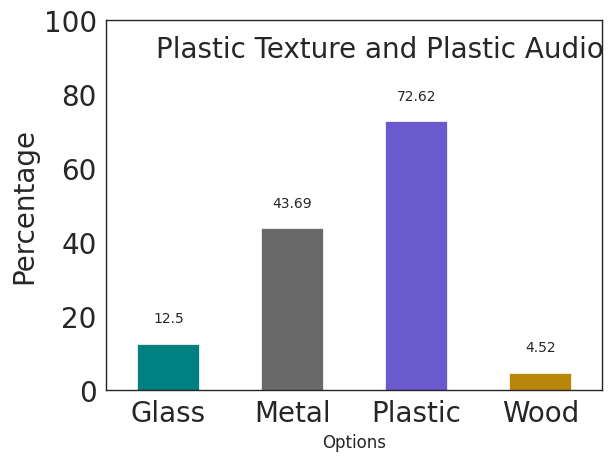

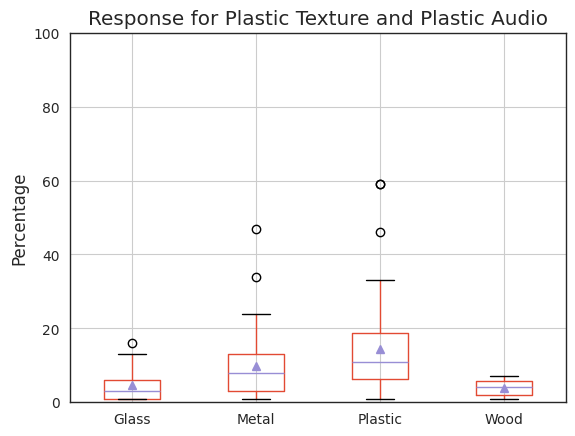

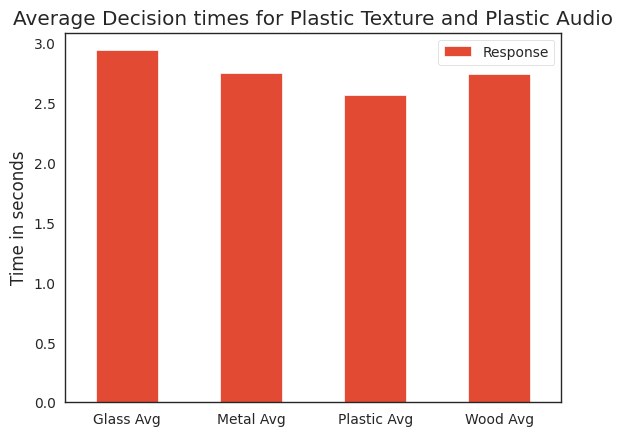

Text(0, 0.5, 'Time in seconds')

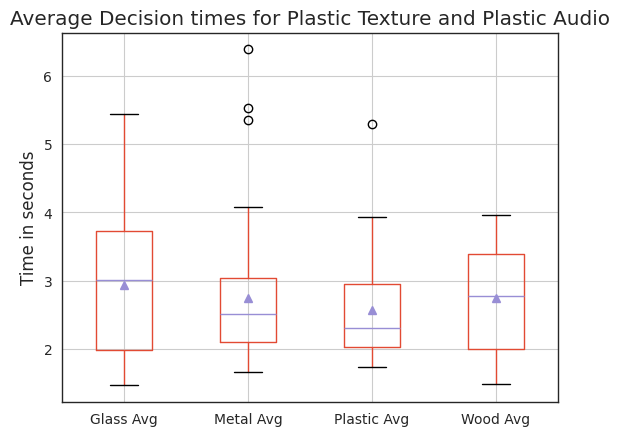

In [25]:
target = 'Plastic'
audio = 'Plastic'
gg_glass = []
gg_metal = []
gg_plastic = []
gg_wood = []
gg_glass_time = []
gg_metal_time = []
gg_plastic_time = []
gg_wood_time = []


for sheet_name, df in agent.items():
  count_g = 0
  sum_time_g = 0
  count_m = 0
  sum_time_m = 0
  count_p = 0
  sum_time_p = 0
  count_w = 0
  sum_time_w = 0
  row_count = 0
  search = sheet_name.split('-')[0]

#searching agent
  for i in df.index:
    if ((df['Target'][i] == target) and (df['Audio Source'][i] == audio)):
      row_count = row_count+1
      if (df['Option'][i] == 'Glass'):
        count_g=count_g+1
        sum_time_g = sum_time_g + df['Normalized RT'][i]
      elif (df['Option'][i] == 'Metal'):
        count_m=count_m+1
        sum_time_m = sum_time_m + df['Normalized RT'][i]
      elif (df['Option'][i] == 'Plastic'):
        count_p=count_p+1
        sum_time_p = sum_time_p + df['Normalized RT'][i]
      elif(df['Option'][i] == 'Wood'):
        count_w=count_w+1
        sum_time_w = sum_time_w + df['Normalized RT'][i]

#searching and adding self
  for sheet_name, df in self_int.items():
    if search in sheet_name:
      for i in df.index:
        if ((df['Target'][i] == target) and (df['Audio Source'][i] == audio)):
          row_count = row_count+1
          if (df['Option'][i] == 'Glass'):
            count_g=count_g+1
            sum_time_g = sum_time_g + df['Normalized RT'][i]
          elif (df['Option'][i] == 'Metal'):
            count_m=count_m+1
            sum_time_m = sum_time_m + df['Normalized RT'][i]
          elif (df['Option'][i] == 'Plastic'):
            count_p=count_p+1
            sum_time_p = sum_time_p + df['Normalized RT'][i]
          elif(df['Option'][i] == 'Wood'):
            count_w=count_w+1
            sum_time_w = sum_time_w + df['Normalized RT'][i]

  if(count_g!=0):
    gg_glass.append(count_g)
  else:
    gg_glass.append(None)
  if(count_m!= 0):
    gg_metal.append(count_m)
  else:
    gg_metal.append(None)
  if(count_p!=0):
    gg_plastic.append(count_p)
  else:
    gg_plastic.append(None)
  if(count_w!=0):
    gg_wood.append(count_w)
  else:
    gg_wood.append(None)

  if(sum_time_g !=0):
    gg_glass_time.append(sum_time_g/count_g)
  else:
    gg_glass_time.append(None)
  if(sum_time_m !=0):
    gg_metal_time.append(sum_time_m/count_m)
  else:
    gg_metal_time.append(None)
  if(sum_time_p !=0):
    gg_plastic_time.append(sum_time_p/count_p)
  else:
    gg_plastic_time.append(None)
  if(sum_time_w !=0):
    gg_wood_time.append(sum_time_w/count_w)
  else:
    gg_wood_time.append(None)

gg_data = pd.DataFrame()
gg_data['Glass'] = gg_glass
gg_data['Glass Avg'] = gg_glass_time
gg_data['Metal'] = gg_metal
gg_data['Metal Avg'] = gg_metal_time
gg_data['Plastic'] = gg_plastic
gg_data['Plastic Avg'] = gg_plastic_time
gg_data['Wood'] = gg_wood
gg_data['Wood Avg'] = gg_wood_time

print(gg_data)
print(gg_data.describe())
gg_desc = pd.DataFrame()
gg_desc = gg_data.describe()

mcg_means = [gg_data['Glass'].sum()/84*10, gg_data['Metal'].sum()/84*10, gg_data['Plastic'].sum()/84*10, gg_data['Wood'].sum()/84*10]
print(mcg_means)

#colors = ['teal', 'dimgrey', 'skyblue', 'darkgoldenrod']

colors = ['teal', 'dimgrey', 'slateblue', 'darkgoldenrod']

sns.set_style("white")

df = pd.DataFrame({'Options':['Glass', 'Metal', 'Plastic', 'Wood'], 'Response':[mcg_means[0], mcg_means[1], mcg_means[2], mcg_means[3]]})
ax = df.plot.bar(x='Options', y='Response', rot=0, color = colors, legend=None, fontsize=20)
ax.set(ylim =(0, 100))
ax.set_ylabel("Percentage", fontsize=20)
#ax.set_title(target + ' Target and '+ audio + ' Audio')
ax.text(0.1, 0.9, target + ' Texture and '+ audio + ' Audio', transform=ax.transAxes, fontsize=20)
# Make some labels.
rects = ax.patches
labels = [round(mcg_means[0], 2), round(mcg_means[1], 2), round(mcg_means[2], 2), round(mcg_means[3], 2)]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.show()

ax2 = gg_data[['Glass', 'Metal', 'Plastic', 'Wood']].boxplot(showmeans=True)
ax2.set_title('Response for '+ target + ' Texture and '+ audio + ' Audio')
ax2.set_ylabel("Percentage")
ax2.set(ylim =(0, 100))

df = pd.DataFrame({'Options':['Glass Avg', 'Metal Avg', 'Plastic Avg', 'Wood Avg'], 'Response':[gg_desc['Glass Avg']['mean'], gg_desc['Metal Avg']['mean'], gg_desc['Plastic Avg']['mean'], gg_desc['Wood Avg']['mean']]})
ax3 = df.plot.bar(x='Options', y='Response', rot=0)
#ax.set(ylim =(0, 100))
ax3.set_title('Average Decision times for '+ target + ' Texture and '+ audio + ' Audio')
ax3.set_ylabel("Time in seconds")
ax3.set_xlabel("")
plt.show()

ax4 = gg_data[['Glass Avg', 'Metal Avg', 'Plastic Avg', 'Wood Avg']].boxplot(showmeans=True)
ax4.set_title('Average Decision times for '+ target + ' Texture and '+ audio + ' Audio')
ax4.set_ylabel("Time in seconds")

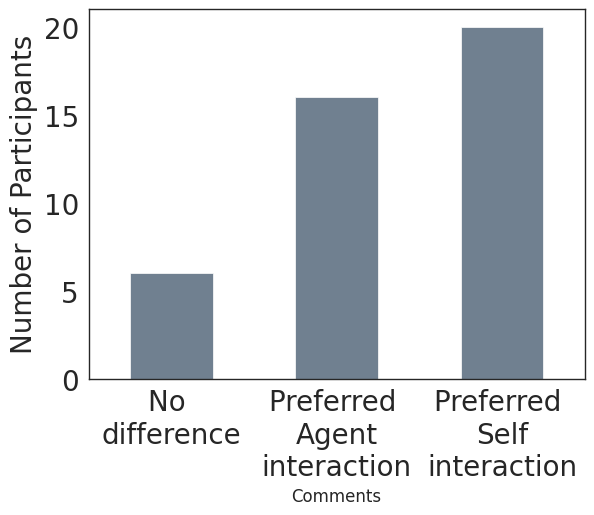

In [26]:
df = pd.DataFrame({'Comments':['No \ndifference', 'Preferred \nAgent\ninteraction', 'Preferred \nSelf\ninteraction'], 'Number of Participants':[6, 16, 20]})
ax = df.plot.bar(x='Comments', y='Number of Participants', rot=0, legend=None, fontsize=20, color = 'slategrey')
ax.set_ylabel("Number of Participants", fontsize=20)
new_list = [0, 5, 10, 15, 20]
plt.yticks(new_list)
plt.show()